<a href="https://colab.research.google.com/github/palash-21/Rossmann_Stores_Sales_Prediction/blob/main/Rossmann_Stores_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

# We have divided the project into 4 parts
1. Data Pre-processing
2. EDA
3. Feature Engineering
4. Model

# 1.1 Lets equip all the necessary tools

In [ ]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from math import sqrt

# 1.2 Load Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path_store_csv = "/content/drive/MyDrive/Colab Notebooks/almabetter pro materials/Capstone Projects/My Capstone Projects/Rossman stores sales prediction/store.csv"
store_df = pd.read_csv(path_store_csv)

path_sales_csv = "/content/drive/MyDrive/Colab Notebooks/almabetter pro materials/Capstone Projects/My Capstone Projects/Rossman stores sales prediction/Rossmann Stores Data.csv"
sales_df = pd.read_csv(path_sales_csv, parse_dates = ['Date'])

#1.3  Data Cleaning

In [ ]:
# Taking a glance on the datasets
print("no of observations & no of features", sales_df.shape)
sales_df.head()

no of observations & no of features (1017209, 9)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 69.8+ MB


Great!! There are no missing values here

In [ ]:
sales_df['Date'].sort_values()

1017208   2013-01-01
1016473   2013-01-01
1016472   2013-01-01
1016471   2013-01-01
1016470   2013-01-01
             ...    
745       2015-07-31
746       2015-07-31
747       2015-07-31
741       2015-07-31
0         2015-07-31
Name: Date, Length: 1017209, dtype: datetime64[ns]

In [ ]:
sales_df['Date'].value_counts()

2015-07-31    1115
2013-11-06    1115
2013-11-18    1115
2013-11-17    1115
2013-11-16    1115
              ... 
2014-10-28     935
2014-10-27     935
2014-10-26     935
2014-10-25     935
2014-12-08     935
Name: Date, Length: 942, dtype: int64

In [ ]:
# Grouping by date
sales_df.groupby(['Store'])['Date'].count().reset_index().groupby(['Date'])["Store"].count().reset_index()

,Date,Store
0,758,180
1,941,1
2,942,934


We have store sales data for 942 days for 934 stores out of 1115 while for 180 stores we only have 758 days of sales data

In [ ]:
# Store open/close
sales_df['Open'].value_counts()

1    844392
0    172817
Name: Open, dtype: int64

In [ ]:
# Lets look at the stores dataset
print("no of observations & no of features", store_df.shape)
store_df.head()

no of observations & no of features (1115, 10)


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [ ]:
store_df[store_df['CompetitionDistance'].isna()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


In [ ]:
#Counting missing values in the dataset

print('store_df :\n\n', store_df.isnull().sum())

store_df :

 Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64


Text(0.5, 1.0, 'Distributin of Store Competition Distance')

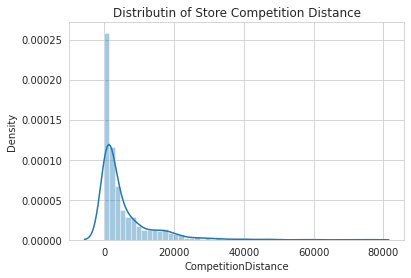

In [ ]:
# CompetitionDistance is distance in meters to the nearest competitor store
# Let's first have a look at its distribution
sns.distplot(store_df.CompetitionDistance)
plt.title("Distributin of Store Competition Distance")

Replacing the missing values with median would be a good choice

In [ ]:
# Replace missing values in CompetitionDistance with median for the store dataset
store_df.CompetitionDistance.fillna(store_df.CompetitionDistance.median(), inplace=True)


In [ ]:
# Lets merge both the files
df=pd.merge(sales_df,store_df,how='left',on='Store')
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
# Lets get year, month, date from current date

def GetYear(date):
  return date.year

def GetMonth(date):
  return date.month

def GetDay(date):
  return date.day



df['Year'] = df['Date'].apply(GetYear)
df['Month'] = df['Date'].apply(GetMonth)
df['Day'] = df['Date'].apply(GetDay)

In [ ]:
# Function to get competition age
def GetCompetitionAge(year,month,date):

  #Initiating with a variable for age
  age=0

  # Comparing the Competition open time with current time
  if date.year>year:
    age+= (date.year-year)*12 + (date.month - month)

  elif date.year == year and date.month>month:
    age+= date.month - month

  return age

In [ ]:
df['CompetitionAge'] = df.apply(lambda x: GetCompetitionAge(x.CompetitionOpenSinceYear, x.CompetitionOpenSinceMonth,x.Date), axis=1)

In [ ]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,CompetitionAge
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31,82.0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,92.0
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,103.0
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,9.0,2009.0,0,NaN,NaN,NaN,2015,7,31,70.0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,4.0,2015.0,0,NaN,NaN,NaN,2015,7,31,3.0


In [ ]:
# There are 3 types of intervals followed by different stores indicating the month in which promo2 new rounf is started
# Lets generate a binary variable showing if new promo2 round is started in the current month or not

# String to List
df['PromoInterval'] = df['PromoInterval'].str.split(',')  

# Converting months into list of month numbers for easy comparison
def GetMonthNumber(month):
  month_dict = {'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sept':9,'Oct':10,'Nov':11,'Dec':12}
  return month_dict[month]

def GetNumList(interval):
  numlist=[]
  for month in interval:
    month_num = GetMonthNumber(month)
    numlist.append(month_num)
  return numlist  

In [ ]:
print(df['PromoInterval'][1], '\n' ,
      GetNumList(df['PromoInterval'][1]))

['Jan', 'Apr', 'Jul', 'Oct'] 
 [1, 4, 7, 10]


In [ ]:
# Function to check promo2 new round

def IsPromo2NewRound(promo_part,promo_year,promo_week,promo_interval,date):

  # Initiating a variable if promo is active
  promo_active = 0
  # Initiating a variable if promo new round is active
  promo_new= 0

  # Taking only stores that are participating in promo2
  if promo_part == 1:
    # Checking if the promo has been activated
    if date.year == promo_year and date.week >= promo_week :
      promo_active = 1

    elif date.year > promo_year :
      promo_active = 1

    if promo_active == 1:
      
      #Getting month_number for easy comparison
      promo_months = GetNumList(promo_interval)
      #Checking if new round is started in current month
      if date.month in promo_months:
        promo_new = 1

  return promo_new

In [ ]:
df['Promo2New'] = df.apply( lambda x : IsPromo2NewRound(x.Promo2,x.Promo2SinceYear,x.Promo2SinceWeek,x.PromoInterval,x.Date),axis=1)
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,CompetitionAge,Promo2New
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,2008.0,0,NaN,NaN,NaN,2015,7,31,82.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,2007.0,1,13.0,2010.0,"[Jan, Apr, Jul, Oct]",2015,7,31,92.0,1
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,2006.0,1,14.0,2011.0,"[Jan, Apr, Jul, Oct]",2015,7,31,103.0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,2009.0,0,NaN,NaN,NaN,2015,7,31,70.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,2015.0,0,NaN,NaN,NaN,2015,7,31,3.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 23 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1017209 no

All null values are dealt with..
One step remains before we move on to EDA

#1.4 Sanity check

In [ ]:
df.dropna(axis=1).describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,Promo2,Year,Month,Day,CompetitionAge,Promo2New
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.422021e+03,5.005638e-01,2.013832e+03,5.846762e+00,1.570279e+01,4.203993e+01,1.493892e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.706918e+03,4.999999e-01,7.773960e-01,3.326097e+00,8.787638e+00,6.534447e+01,3.564718e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,0.000000e+00,2.013000e+03,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,0.000000e+00,2.013000e+03,3.000000e+00,8.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.325000e+03,1.000000e+00,2.014000e+03,6.000000e+00,1.600000e+01,1.600000e+01,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.880000e+03,1.000000e+00,2.014000e+03,8.000000e+00,2.300000e+01,7.300000e+01,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,1.000000e+00,2.015000e+03,1.200000e+01,3.100000e+01,1.386000e+03,1.000000e+00


In [ ]:
# Stateholiday dtype is object, lets check why
df['StateHoliday'].value_counts()


0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [ ]:
# Converting all number 0 to string '0' for no holiday
df['StateHoliday'][df['StateHoliday']==0] = '0'

In [ ]:
df['StateHoliday'].value_counts()

0    986159
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [ ]:
# Store open/close
df[df['Open']==0][['Sales','Customers','StateHoliday','SchoolHoliday']].value_counts()

Sales  Customers  StateHoliday  SchoolHoliday
0      0          0             0                139610
                  a             0                 14465
                  b             1                  6067
                  a             1                  5101
                  c             1                  4029
                  0             1                  3067
                  b             0                   478
dtype: int64

In [ ]:
# Check entries for which Sales is zero
df[df['Sales']==0][["Open",'Customers','StateHoliday','SchoolHoliday']].value_counts()

Open  Customers  StateHoliday  SchoolHoliday
0     0          0             0                139610
                 a             0                 14465
                 b             1                  6067
                 a             1                  5101
                 c             1                  4029
                 0             1                  3067
                 b             0                   478
1     0          0             0                    40
                               1                    12
      3          0             0                     1
      5          0             0                     1
dtype: int64

1.   Store are closed even when there is no state or school holiday, this may be for refurbishment as mentioned in the problem statement
2.   Sales is zero for some entries even when store is open , this may cause bias in model so we should remove this as we dont want our model to predict zero sales for any store

In [ ]:
df.drop(df[(df['Sales']==0) & (df['Open']==1)].index,inplace=True)

In [ ]:
df.shape

(1017155, 23)

#2 Exploratory Data Analysis

In [ ]:
df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Year,Month,Day,CompetitionAge,Promo2New
count,1.017155e+06,1.017155e+06,1.017155e+06,1.017155e+06,1.017155e+06,1.017155e+06,1.017155e+06,1.017155e+06,693826.000000,693826.000000,1.017155e+06,509139.000000,509139.000000,1.017155e+06,1.017155e+06,1.017155e+06,1.017155e+06,1.017155e+06
mean,5.584284e+02,3.998356e+00,5.774126e+03,6.331796e+02,8.300977e-01,3.815141e-01,1.786444e-01,5.422165e+03,7.222835,2008.690232,5.005520e-01,23.269714,2011.752700,2.013832e+03,5.846792e+00,1.570280e+01,4.204004e+01,1.493853e-01
std,3.219078e+02,1.997420e+00,3.849799e+03,4.644012e+02,3.755472e-01,4.857585e-01,3.830544e-01,7.707027e+03,3.211810,5.992658,4.999999e-01,14.096037,1.662857,7.774051e-01,3.326120e+00,8.787591e+00,6.534467e+01,3.564680e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000,1900.000000,0.000000e+00,1.000000,2009.000000,2.013000e+03,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.728000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,4.000000,2006.000000,0.000000e+00,13.000000,2011.000000,2.013000e+03,3.000000e+00,8.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.325000e+03,8.000000,2010.000000,1.000000e+00,22.000000,2012.000000,2.014000e+03,6.000000e+00,1.600000e+01,1.600000e+01,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.880000e+03,10.000000,2013.000000,1.000000e+00,37.000000,2013.000000,2.014000e+03,8.000000e+00,2.300000e+01,7.300000e+01,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,12.000000,2015.000000,1.000000e+00,50.000000,2015.000000,2.015000e+03,1.200000e+01,3.100000e+01,1.386000e+03,1.000000e+00


In [ ]:
#DF only for when store is open
df_open = df[df['Open']==1]
df_open.drop(columns=["Open"],inplace=True)

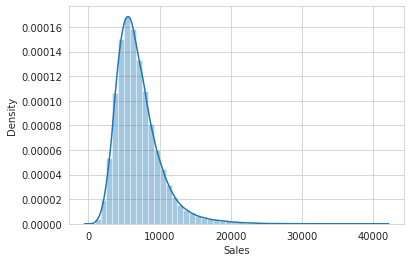

In [ ]:
# Lets look at our dependant variable
sns.distplot(df_open['Sales'])

There is positive skewness, so we should use transformation before training our model

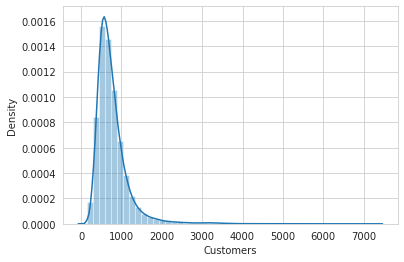

In [ ]:
# Customers
sns.distplot(df_open['Customers'])

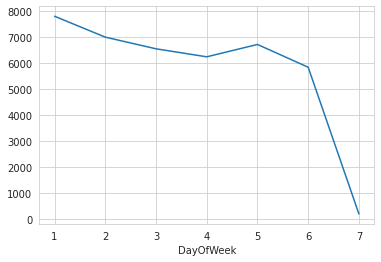

In [ ]:
# Week-days-wise average sales
df.groupby('DayOfWeek')['Sales'].mean().plot()

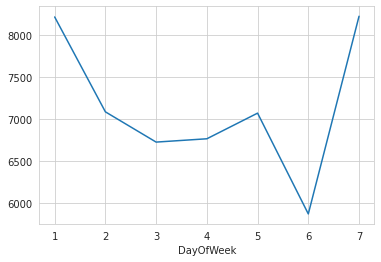

In [ ]:
# Week-days-wise average sales only when store is open
df_open.groupby('DayOfWeek')['Sales'].mean().plot()

As it is evident from the entries day 1 is Monday.

While stores are mostly closed on sundays, sales is highest when open.

Apart from sunday, sale is maximum on Mondays

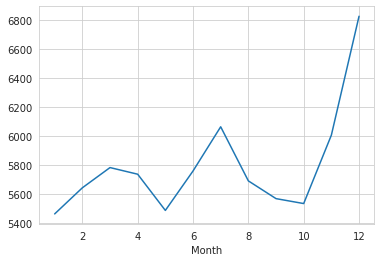

In [ ]:
# Monthly Average Sales
# As we dont have data for 2015 whole year, sum of sales wont be the correct statistic, lets take average. 
df.groupby('Month')['Sales'].mean().plot()

Towards year ending sales are better on an average 

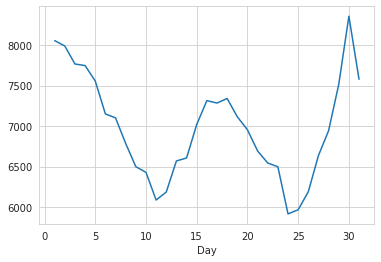

In [ ]:
# Date of the month vs Sales
df_open.groupby('Day')['Sales'].mean().plot()

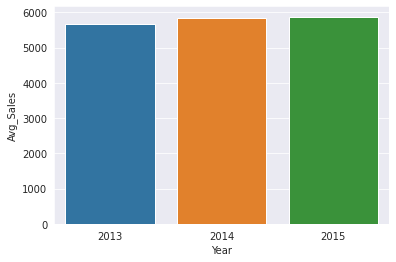

In [ ]:
# Year vs sales(average)
temp_df = df.groupby([df.Year])['Sales'].mean().reset_index()
temp_df.rename(columns={'Sales':'Avg_Sales'},inplace=True)
x=temp_df['Year']
y=temp_df['Avg_Sales']
sns.set_style("darkgrid")
sns.barplot(x=x,y=y)
plt.show()

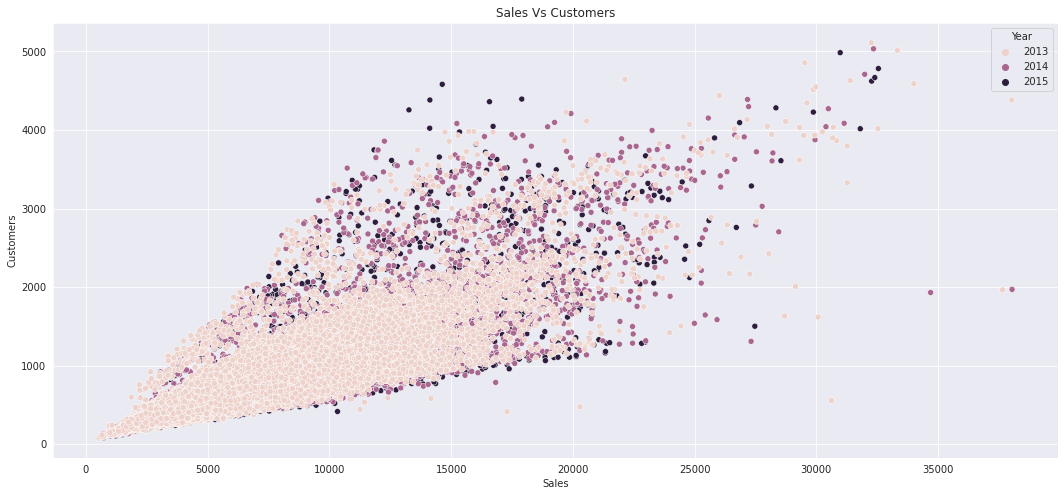

In [ ]:
# Sales vs customers
plt.figure(figsize=(18,8))
temp_df = df_open.sample(100000)
sns.scatterplot(temp_df.Sales, temp_df.Customers, hue=df.Year)
plt.title("Sales Vs Customers")
plt.show()

In [ ]:
store_df.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

Text(0.5, 1.0, 'Number of stores running promo')

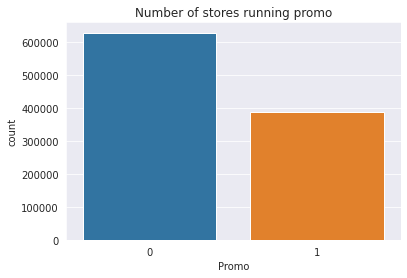

In [ ]:
# Number of stores running promo
sns.countplot(x=sales_df['Promo']).set_title('Number of stores running promo')

Stores are not running promo for majority of days

[Text(0.5, 1.0, 'Sales vs Promo')]

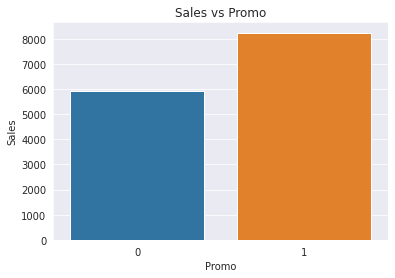

In [ ]:
# Lets see how promo is impacting sales
sns.barplot(x='Promo',y='Sales',data=df_open).set(title='Sales vs Promo')

It is evident that promo is effective

Text(0.5, 1.0, 'Number of stores running promo2')

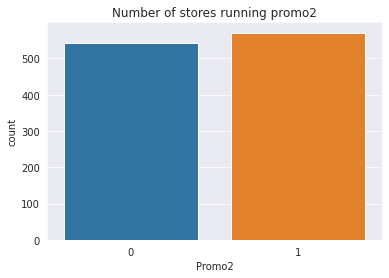

In [ ]:
# Number of stores participating in promo2
sns.countplot(x=store_df['Promo2']).set_title('Number of stores running promo2')

More than 50% of stores are participating in Promo2

[Text(0.5, 1.0, 'Sales vs Promo2new')]

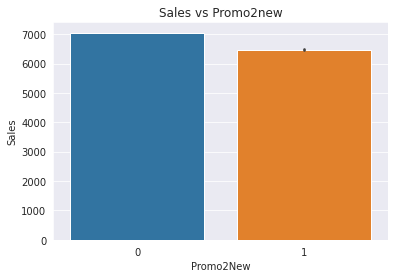

In [ ]:
# Effect on sales when new promo2 is started 
sns.barplot(x='Promo2New',y='Sales',data=df_open).set(title='Sales vs Promo2new')

Promo 2 is ineffective

In [ ]:
# Lets look at the storetype
store_df["StoreType"].value_counts()

a    602
d    348
c    148
b     17
Name: StoreType, dtype: int64

So, majority of stores are of 'a' type , followed by d and c while b type are the least 

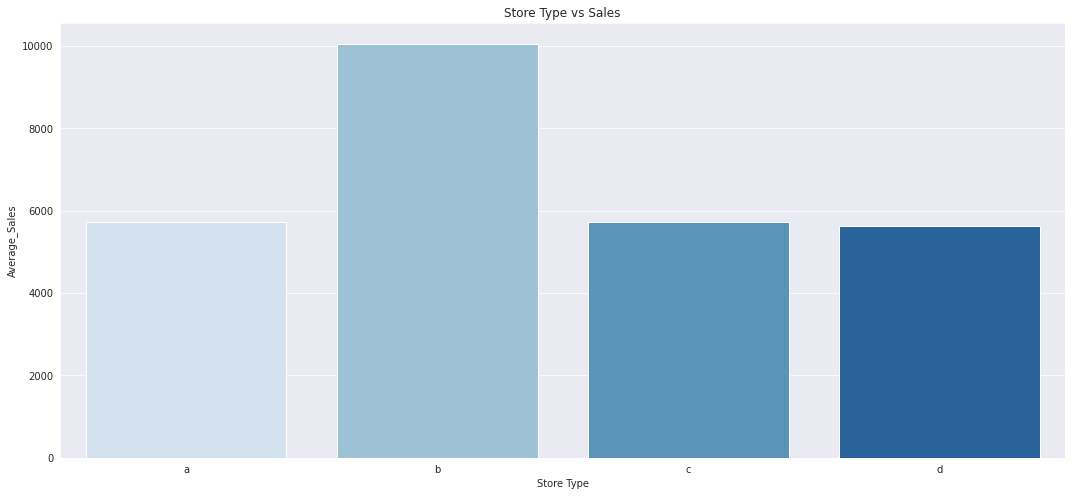

In [ ]:
# Store type
plt.figure(figsize=(18,8))
temp_df = df.groupby(df.StoreType).mean()
sns.barplot(temp_df.index, temp_df.Sales, palette='Blues')
plt.title("Store Type vs Sales")
plt.xlabel('Store Type')
plt.ylabel('Average_Sales')
plt.show()

Store b are the least in numbers but on an average outperforms other store types

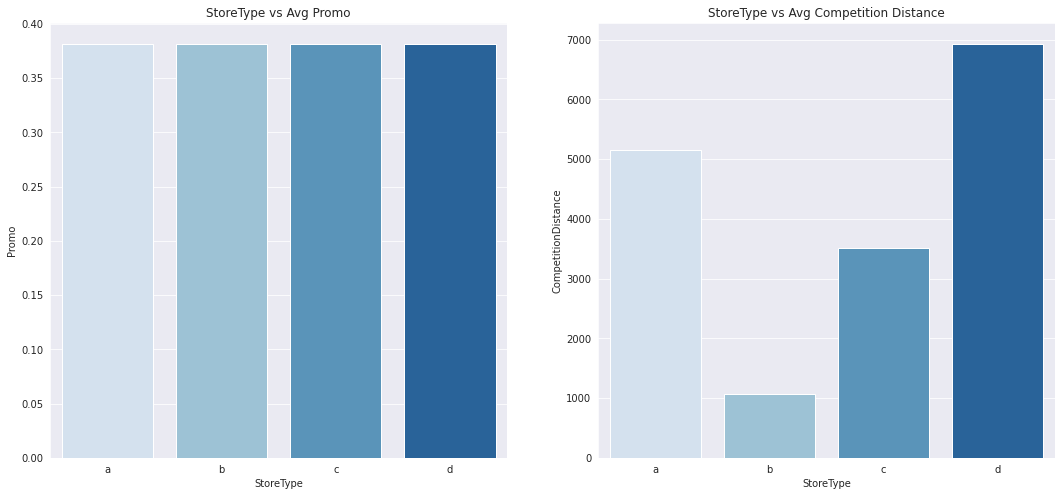

In [ ]:
# Store type and competition
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18,8))
temp_df = df.groupby(df.StoreType).mean()
sns.barplot(temp_df.index, temp_df['Promo'], ax=ax1, palette='Blues').set(title='StoreType vs Avg Promo')
temp_df = df.groupby(df.StoreType).mean()
sns.barplot(temp_df.index, temp_df['CompetitionDistance'], ax=ax2, palette='Blues').set(title='StoreType vs Avg Competition Distance')
plt.show()

Store type b has the least competition , meaning distance from the nearest competition is the lowest on an average for store type b.



In [ ]:
# Assortment level of stores
store_df['Assortment'].value_counts()

a    593
c    513
b      9
Name: Assortment, dtype: int64

[Text(0.5, 1.0, 'Avg Sales vs Assortment Level')]

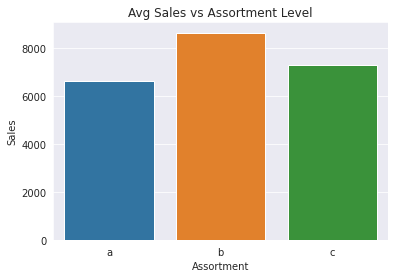

In [ ]:
# Sales vs Assortment Type
temp_df=pd.DataFrame(df_open.groupby('Assortment')['Sales'].mean())
sns.barplot(temp_df.index, temp_df.Sales).set(title='Avg Sales vs Assortment Level')
#temp_df

Assortement level indicates a = basic, b = extra, c = extended
So, extra level has highest average sales

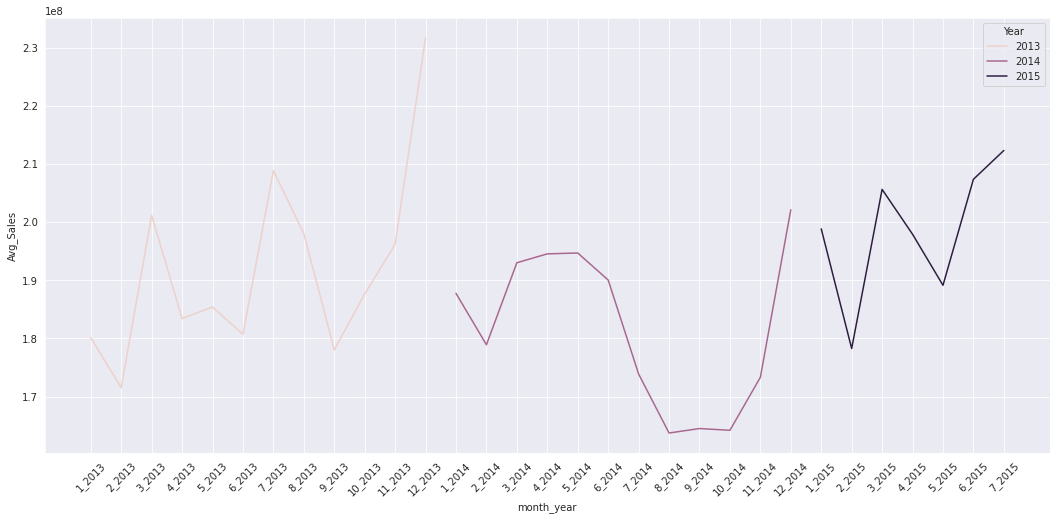

In [ ]:
# Sales trend
temp_df = df_open.groupby([(df.Year),(df.Month)])['Sales'].sum().reset_index()
temp_df.rename(columns={'Sales':'Avg_Sales'},inplace=True)
temp_df['month_year'] = temp_df['Month'].astype(str) + '_' + temp_df['Year'].astype(str)

plt.figure(figsize=(18,8))
x=temp_df['month_year']
y=temp_df['Avg_Sales']
sns.lineplot(x=x,y=y,hue=temp_df['Year'])
plt.xticks(rotation=45)
plt.show()
#temp_df

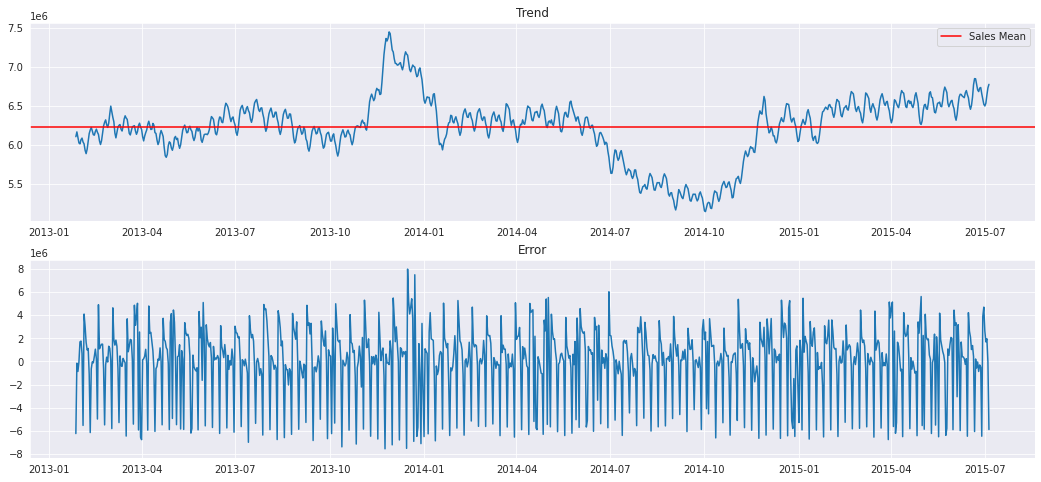

In [ ]:
# Lets look at the trend and seasonal part
from statsmodels.tsa.seasonal import seasonal_decompose
temp_df = df_open.copy()
temp_df.Date = pd.to_datetime(temp_df.Date)
temp_df.index = temp_df.Date
temp_df.Sales = temp_df.Sales.apply(lambda x: None if x == 0 else x)
temp_df.Sales = temp_df.Sales.fillna(method='ffill').fillna(method='bfill')
temp_df = temp_df[['Sales']]
temp_df = temp_df.groupby(temp_df.index).sum()
result = seasonal_decompose(temp_df, model='additive', freq=52)

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(18,8))
ax1.plot(result.trend)
ax1.axhline(y = temp_df.Sales.mean(), color = 'r', linestyle = '-', label='Sales Mean')
ax1.set_title("Trend")
ax2.plot(result.resid)
ax2.set_title("Error")
ax1.legend()
plt.show()

2015 seems to be a good year as the trend line is above the average trend line.

There is a increase in sales at year-ending as compared to previous months.

There is a dip in year 2014 from July-Oct

I wonder what drived that?

In [ ]:
# First lets check the number of stores open 
temp_df = pd.DataFrame()
temp_df['2013']= df[df['Year']==2013].groupby('Month')["Open"].sum()
temp_df['2014']= df[df['Year']==2014].groupby('Month')["Open"].sum()
temp_df['2015']= df[df['Year']==2015].groupby('Month')["Open"].sum()
temp_df

,2013,2014,2015
Month,,,
1,28865,28707,28763.0
2,26682,26791,26766.0
3,27891,29005,29079.0
4,27878,26917,26931.0
5,26199,28021,25879.0
6,27939,26209,28423.0
7,30164,25224,30188.0
8,30023,24388,NaN
9,27980,24341,NaN


Many of the stores where closed in 2nd half of 2014 that lead to dip in sales

Stores may be closed for refurbishment 

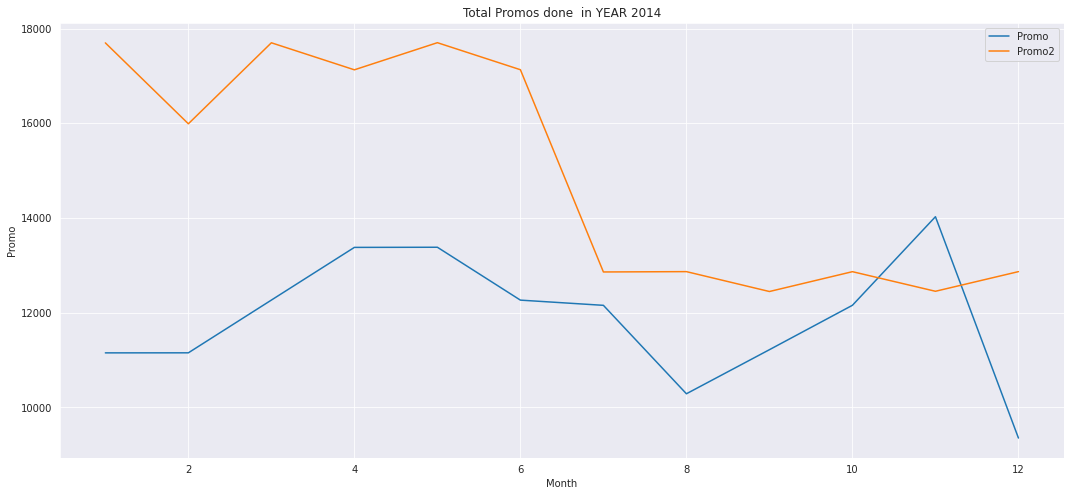

In [ ]:
# Promos done in year 2014
plt.figure(figsize=(18,8))
temp_df = df.copy()
temp_df.index = temp_df.Date
temp_df= temp_df[temp_df.Year==2014]
temp_df = temp_df.groupby(temp_df.Month).sum()


plt.title('Total Promos done  in YEAR 2014')
sns.lineplot(temp_df.index, temp_df.Promo,palette='Blues',label='Promo')
sns.lineplot(temp_df.index, temp_df.Promo2, palette='Blues', label='Promo2')
plt.legend()
plt.show()
#temp_df.head()

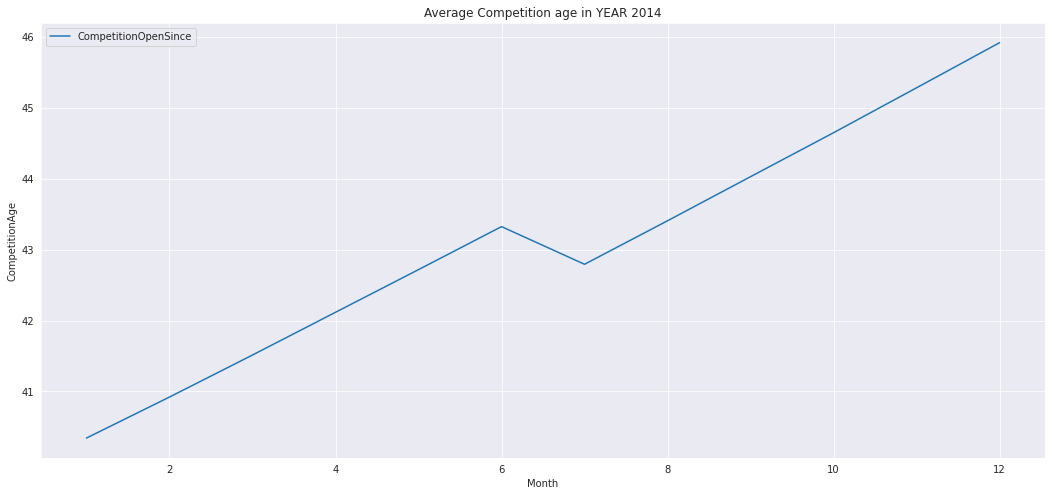

In [ ]:
# Lets check if there is any entry of new competition
plt.figure(figsize=(18,8))
temp_df = df.copy()
temp_df.index = temp_df.Date
temp_df= temp_df[temp_df.Year==2014]
temp_df = temp_df.groupby(temp_df.Month).mean()


plt.title('Average Competition age in YEAR 2014')
sns.lineplot(temp_df.index, temp_df.CompetitionAge,palette='Blues',label='CompetitionOpenSince')
plt.legend()
plt.show()

Stores have decreased promo participation after june 2014 and also there is new entry in competition which may also have factored in the dip in sales

[Text(0.5, 1.0, 'Avg Sales vs StateHoliday')]

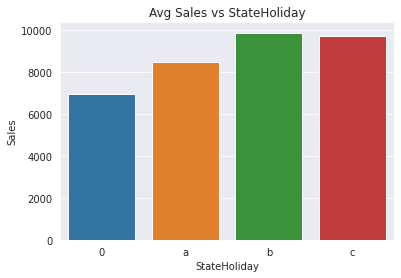

In [ ]:
# Stateholiday vs Sales
temp_df=pd.DataFrame(df_open.groupby('StateHoliday')['Sales'].mean())
sns.barplot(temp_df.index, temp_df.Sales).set(title='Avg Sales vs StateHoliday')
#temp_df

Ss we already know that a = public holiday, b = Easter holiday, c = Christmas  so sales are maximum on Easter holiday on an average followed by Christmas while on a regular day sales are low ( on average)

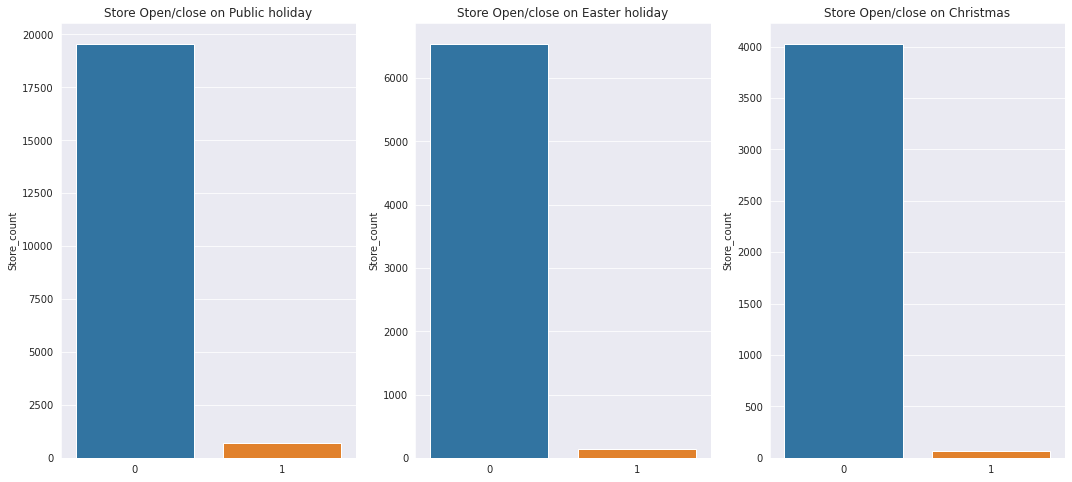

In [ ]:
# Lets check for all 3 holidays, stores are open/close
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(18,8))
temp_df = pd.DataFrame(df[df['StateHoliday']=='a']["Open"].value_counts()).rename(columns={'Open':'Store_count'})
sns.barplot(temp_df.index,temp_df.Store_count,ax=ax1).set(title='Store Open/close on Public holiday')
temp_df = pd.DataFrame(df[df['StateHoliday']=='b']["Open"].value_counts()).rename(columns={'Open':'Store_count'})
sns.barplot(temp_df.index,temp_df.Store_count,ax=ax2).set(title='Store Open/close on Easter holiday')
temp_df = pd.DataFrame(df[df['StateHoliday']=='c']["Open"].value_counts()).rename(columns={'Open':'Store_count'})
sns.barplot(temp_df.index,temp_df.Store_count,ax=ax3).set(title='Store Open/close on Christmas')
plt.show()

We can see that stores are mostly closed on all state holidays

[Text(0.5, 1.0, 'School Holiday vs Sales')]

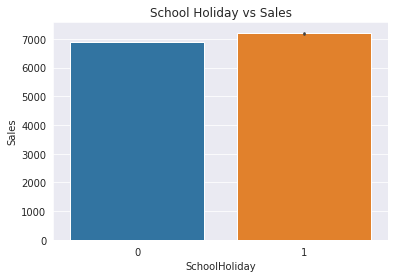

In [ ]:
# Sales vs School Holiday
sns.barplot(x='SchoolHoliday', y='Sales', data=df_open).set(title='School Holiday vs Sales')

Sales are higher on school holidays

[Text(0.5, 1.0, 'Store Open/close on SchoolHoliday')]

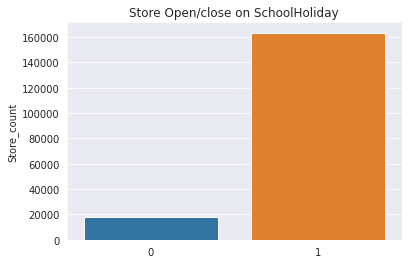

In [ ]:
# Store open/close on Schoolholiday
temp_df = pd.DataFrame(df[df['SchoolHoliday']==1]["Open"].value_counts()).rename(columns={'Open':'Store_count'})
#temp_df
sns.barplot(temp_df.index,temp_df.Store_count).set(title='Store Open/close on SchoolHoliday')

We can say that stores mostly remain open on school holidays.

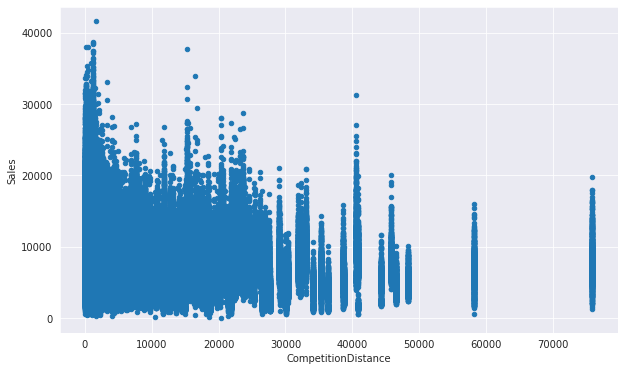

In [ ]:
# Competetion distance
df_open.plot(x='CompetitionDistance',y='Sales',kind='scatter',figsize =(10,6))

Rossman stores are performing well even when competition distance is low.

#3 Feature Engineering

In [ ]:
# Making a copy of df
df1 = df.copy()

In [ ]:
# One hot encoding for categorical features
df1=pd.concat([df1,pd.get_dummies(df1['StateHoliday'],prefix='holy')],axis=1).drop(['StateHoliday'],axis=1)
df1=pd.concat([df1,pd.get_dummies(df1['StoreType'],prefix='type')],axis=1).drop(['StoreType'],axis=1)
df1=pd.concat([df1,pd.get_dummies(df1['Assortment'],prefix='assort')],axis=1).drop(['Assortment'],axis=1)
df1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,...,holy_a,holy_b,holy_c,type_a,type_b,type_c,type_d,assort_a,assort_b,assort_c
0,1,5,2015-07-31,5263,555,1,1,1,1270.0,9.0,...,0,0,0,0,0,1,0,1,0,0
1,2,5,2015-07-31,6064,625,1,1,1,570.0,11.0,...,0,0,0,1,0,0,0,1,0,0
2,3,5,2015-07-31,8314,821,1,1,1,14130.0,12.0,...,0,0,0,1,0,0,0,1,0,0
3,4,5,2015-07-31,13995,1498,1,1,1,620.0,9.0,...,0,0,0,0,0,1,0,0,0,1
4,5,5,2015-07-31,4822,559,1,1,1,29910.0,4.0,...,0,0,0,1,0,0,0,1,0,0


In [ ]:
df1.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'SchoolHoliday', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Year', 'Month', 'Day',
       'CompetitionAge', 'Promo2New', 'holy_0', 'holy_a', 'holy_b', 'holy_c',
       'type_a', 'type_b', 'type_c', 'type_d', 'assort_a', 'assort_b',
       'assort_c'],
      dtype='object')

In [ ]:
# Number of Customers will not be available for predictions, so we cannot use it directly in our model.
# Customers change according to week-day, date of the month ,month of the year, 
# so lets use average of customers in the past as a feature for future predictions.
# Calculating monthly, weekly and date-wise average of customers in the past
# (excluding last 6 weeks as we will use that in test set)
# We will do this at store level 

last_date = df1['Date'].max() - datetime.timedelta(42) 
past_df = df1[df1['Date']<=last_date]

monthly_avg_cust_df = past_df.groupby(['Store','Month'])['Customers'].mean().reset_index().rename(columns={'Customers':'Month_Avg_Cust'})
weekday_avg_cust_df = past_df.groupby(['Store','DayOfWeek'])['Customers'].mean().reset_index().rename(columns={'Customers':'Week_Day_Avg_Cust'})
date_avg_cust_df = past_df.groupby(['Store','Day'])['Customers'].mean().reset_index().rename(columns={'Customers':'Day_Avg_Cust'})
 

df1 = pd.merge(df1,monthly_avg_cust_df,how='left',on=['Store','Month']) 
df1 = pd.merge(df1,weekday_avg_cust_df,how='left',on=['Store','DayOfWeek']) 
df1 = pd.merge(df1,date_avg_cust_df,how='left',on=['Store','Day'])   

In [ ]:
# Coverting avg customers into int
df1['Month_Avg_Cust'] = df1['Month_Avg_Cust'].astype(int)
df1['Week_Day_Avg_Cust'] = df1['Week_Day_Avg_Cust'].astype(int)
df1['Day_Avg_Cust'] = df1['Day_Avg_Cust'].astype(int)
df1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,...,type_a,type_b,type_c,type_d,assort_a,assort_b,assort_c,Month_Avg_Cust,Week_Day_Avg_Cust,Day_Avg_Cust
0,1,5,2015-07-31,5263,555,1,1,1,1270.0,9.0,...,0,0,1,0,1,0,0,463,539,460
1,2,5,2015-07-31,6064,625,1,1,1,570.0,11.0,...,1,0,0,0,1,0,0,559,534,401
2,3,5,2015-07-31,8314,821,1,1,1,14130.0,12.0,...,1,0,0,0,1,0,0,654,748,617
3,4,5,2015-07-31,13995,1498,1,1,1,620.0,9.0,...,0,0,1,0,0,0,1,1069,1243,1235
4,5,5,2015-07-31,4822,559,1,1,1,29910.0,4.0,...,1,0,0,0,1,0,0,498,540,343


In [ ]:
# Removing all features that are not useful any more
df1.drop(columns =['Customers','CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'], inplace=True) 

In [ ]:
corr=df1.drop(columns=["Date"]).corr()
corr['Sales']

Store                  0.005133
DayOfWeek             -0.462170
Sales                  1.000000
Open                   0.678553
Promo                  0.452385
SchoolHoliday          0.085141
CompetitionDistance   -0.018899
Promo2                -0.091012
Year                   0.023508
Month                  0.048758
Day                   -0.011615
CompetitionAge        -0.004119
Promo2New             -0.043114
holy_0                 0.254245
holy_a                -0.203052
holy_b                -0.117510
holy_c                -0.092628
type_a                -0.010060
type_b                 0.139987
type_c                -0.005128
type_d                -0.022889
assort_a              -0.080484
assort_b               0.065531
assort_c               0.068754
Month_Avg_Cust         0.457655
Week_Day_Avg_Cust      0.766523
Day_Avg_Cust           0.471308
Name: Sales, dtype: float64

Text(0.5, 1.0, 'Correlation Heatmap')

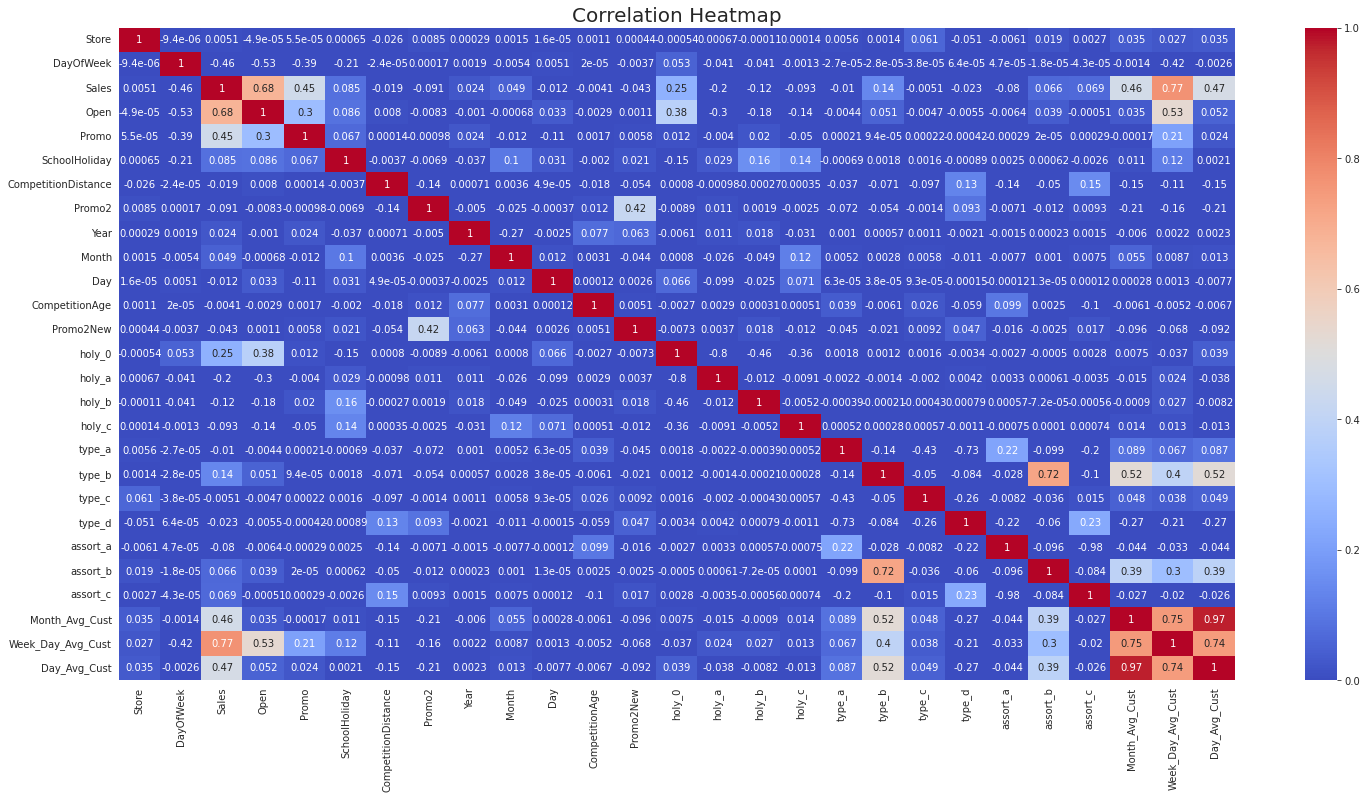

In [ ]:
# Heatmap
f,ax = plt.subplots(figsize = (25,12))
sns.heatmap(corr,vmin=0,annot=True,cmap='coolwarm')
plt.title("Correlation Heatmap", fontsize=20)

From the heatmap, we can briefly comment that important features apart from 'Open' are WeekDayAvgCust,DayAvgCust, MonthAvgCust,Promo,holy_0(no holiday),type_b(store_type)

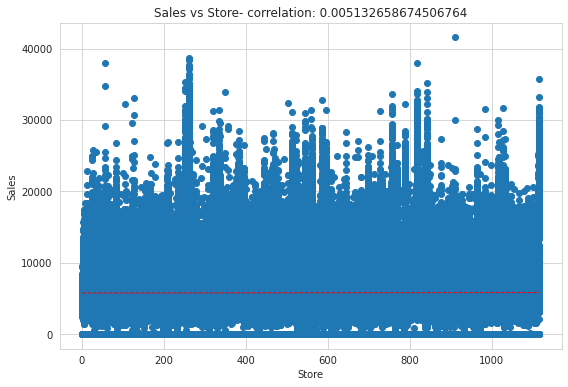

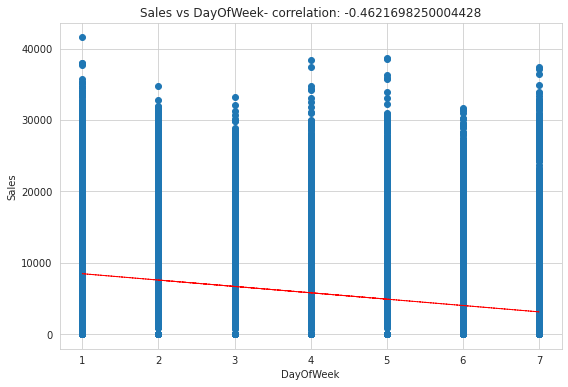

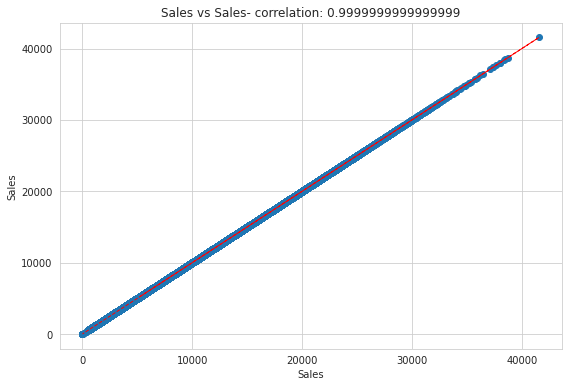

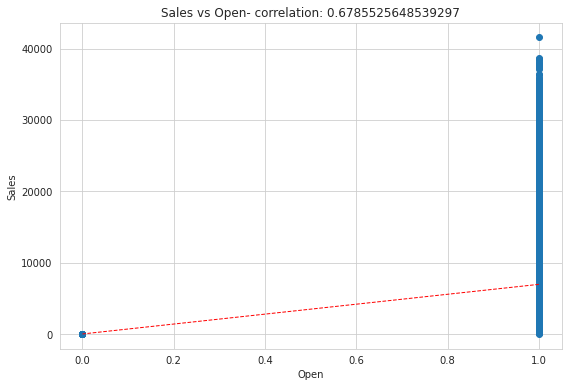

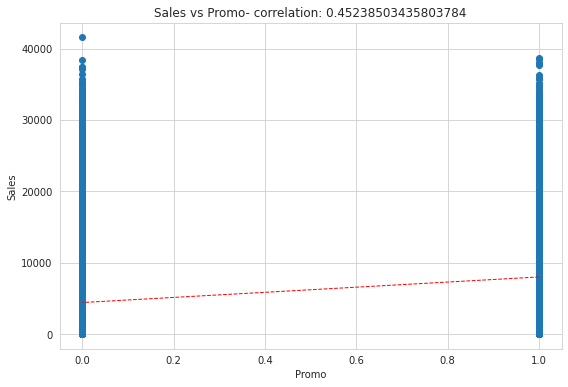

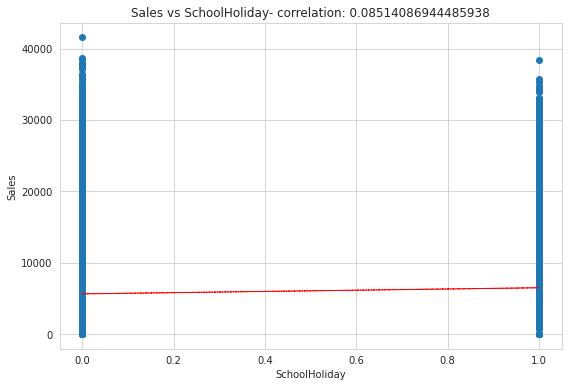

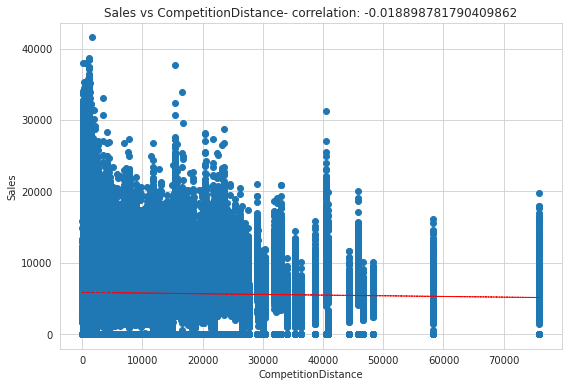

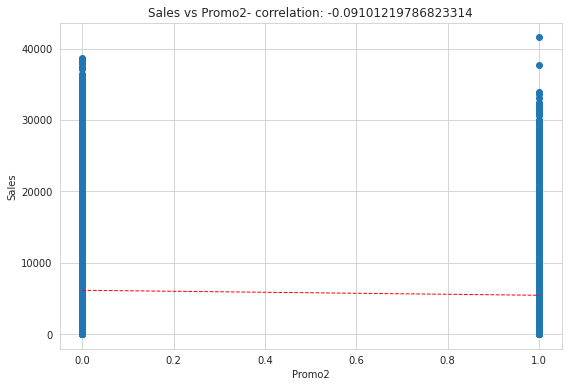

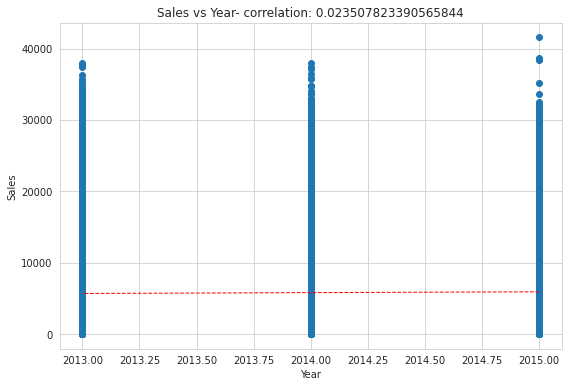

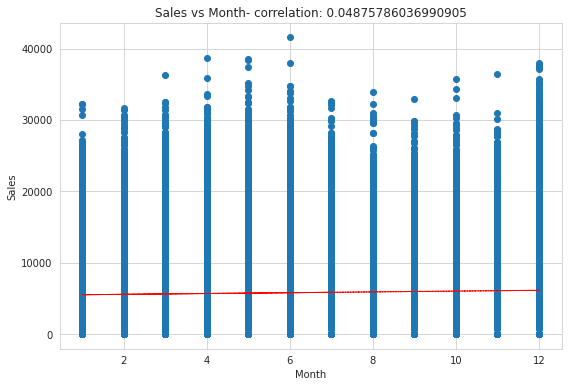

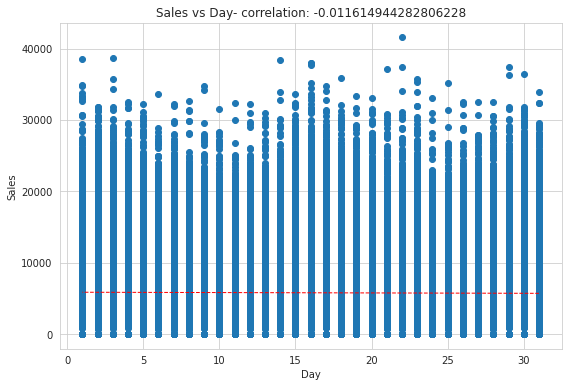

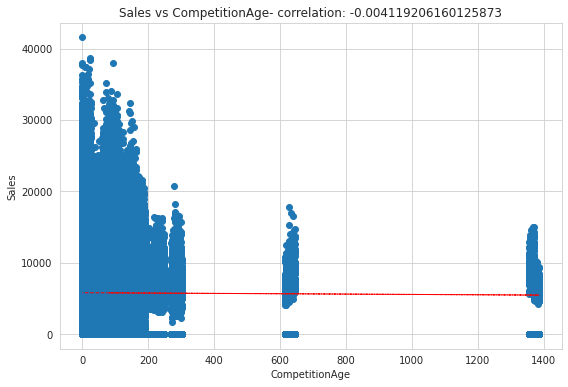

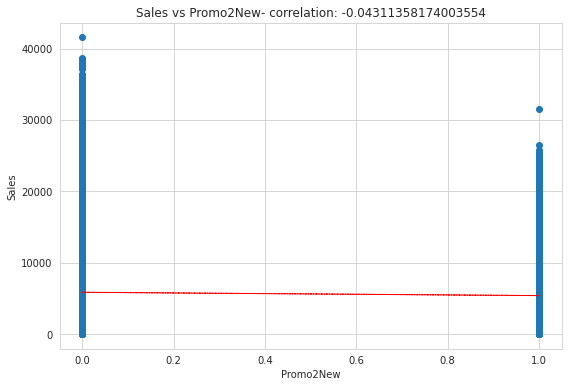

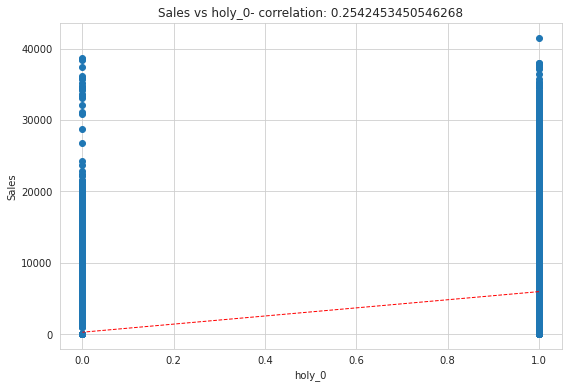

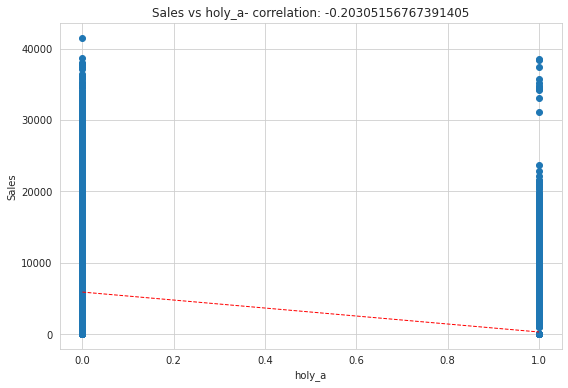

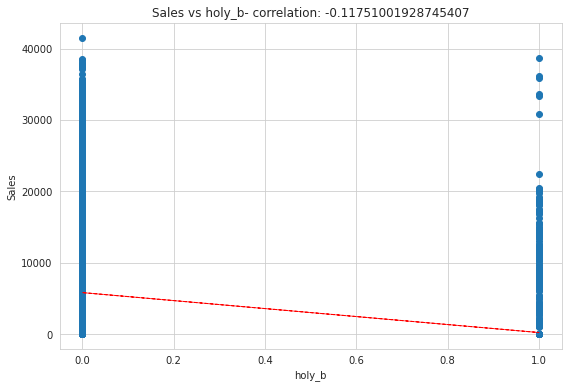

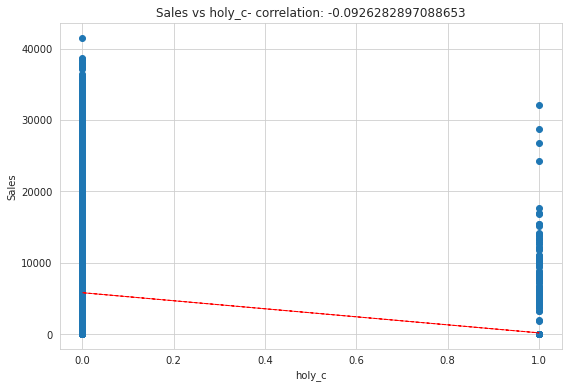

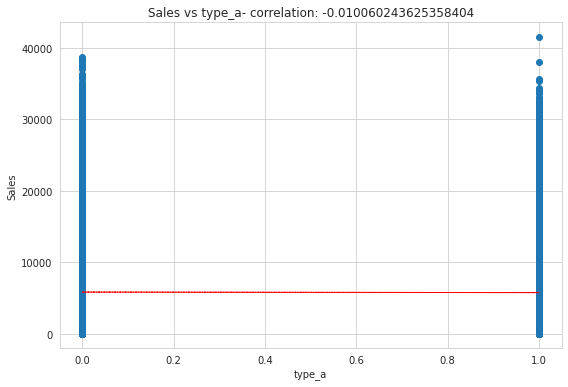

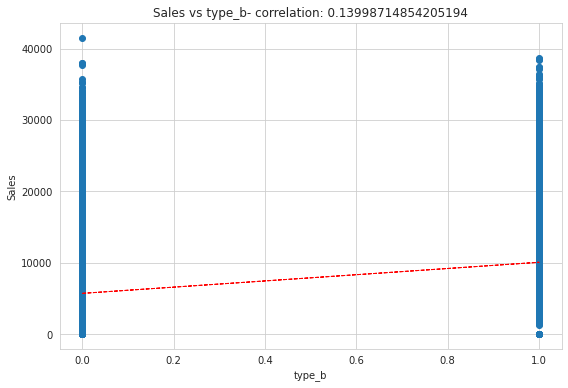

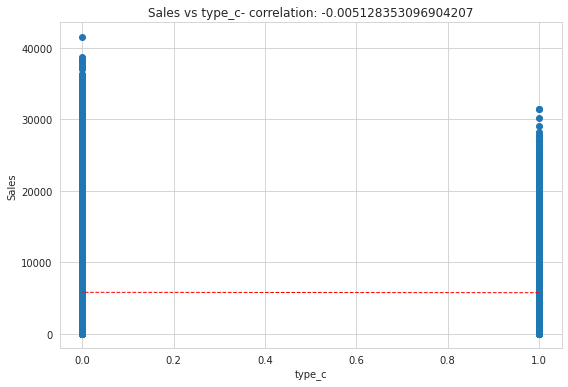

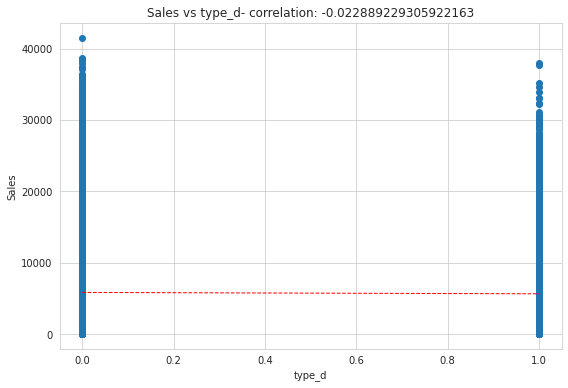

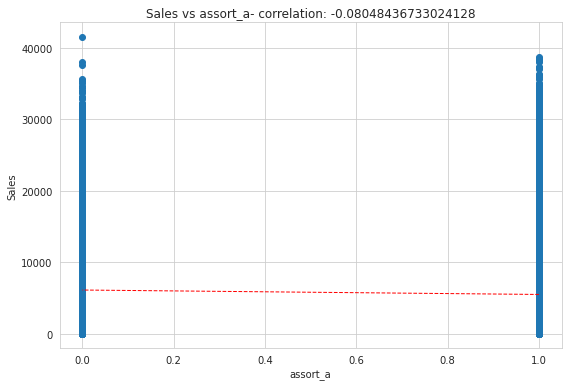

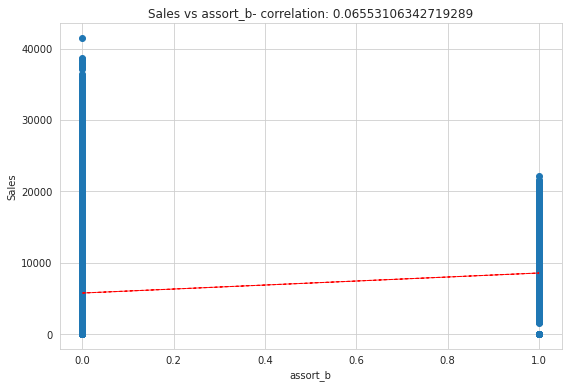

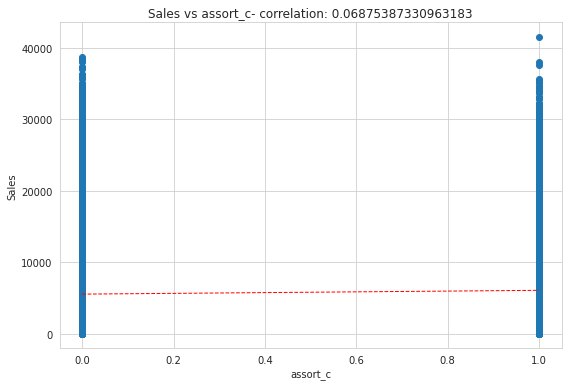

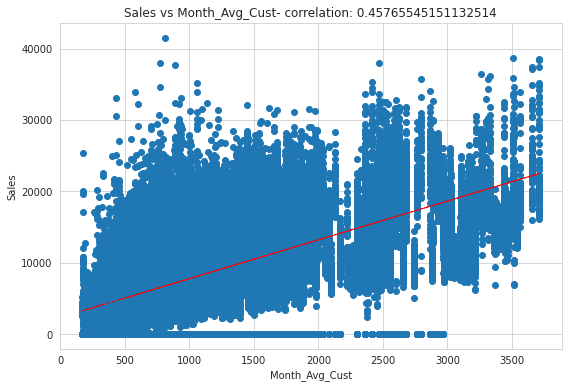

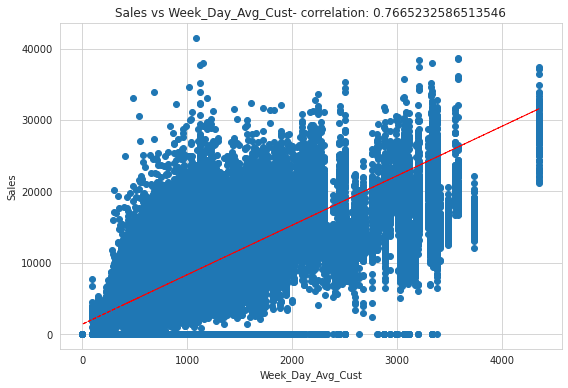

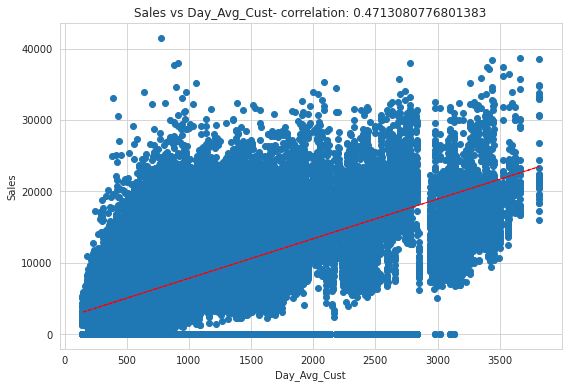

In [ ]:
# Correlation
for col in df1.drop(columns=['Date']):
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df1[col]
    label = df1['Sales']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Sales')
    ax.set_title('Sales vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df1[col], df1['Sales'], 1)
    y_hat = np.poly1d(z)(df1[col])

    plt.plot(df1[col], y_hat, "r--", lw=1)

plt.show()

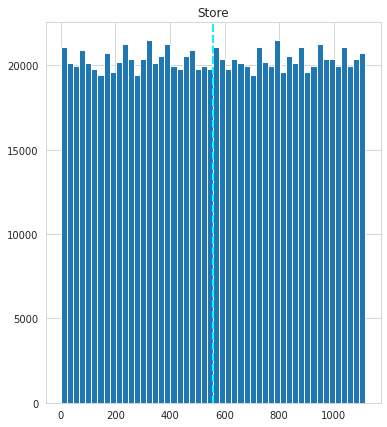

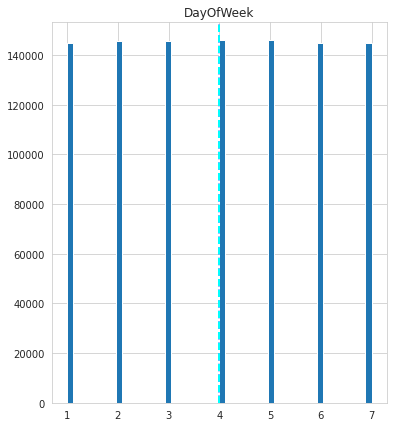

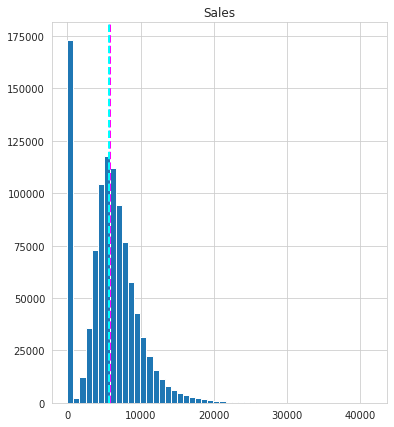

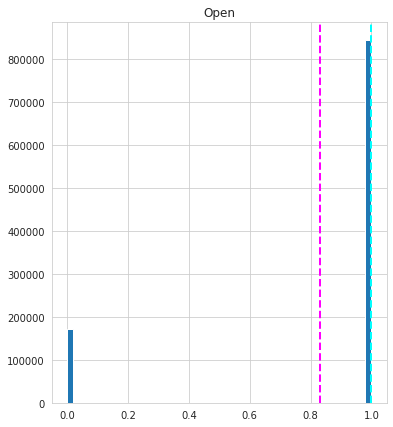

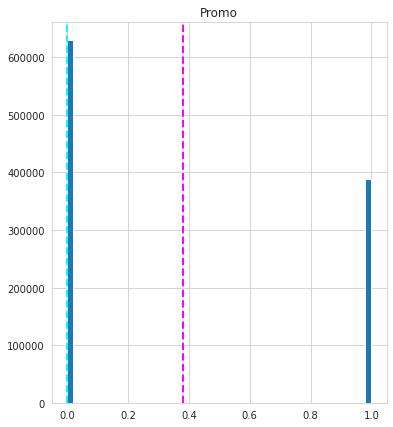

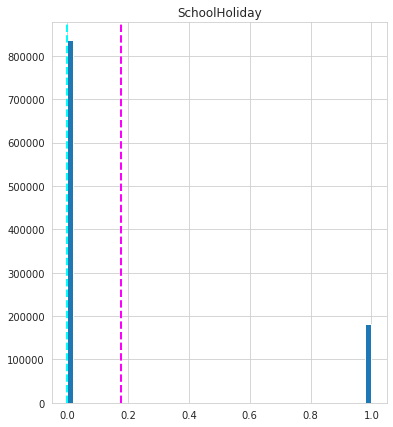

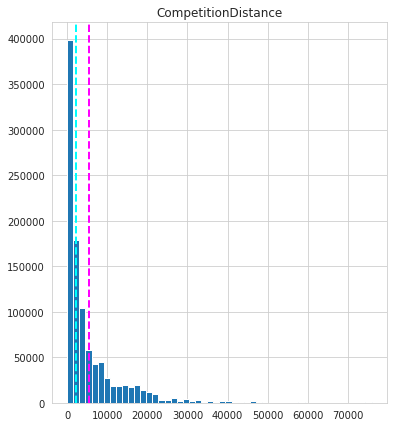

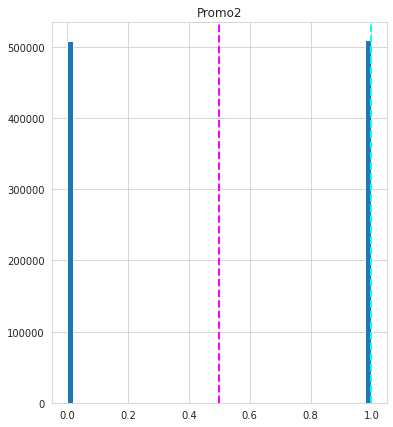

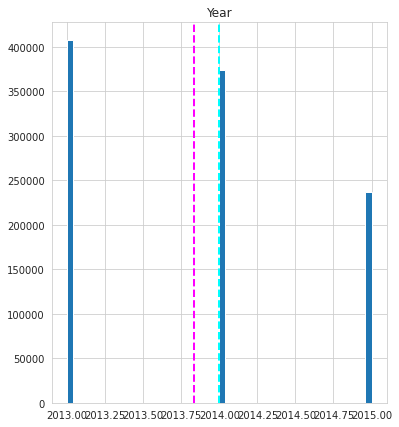

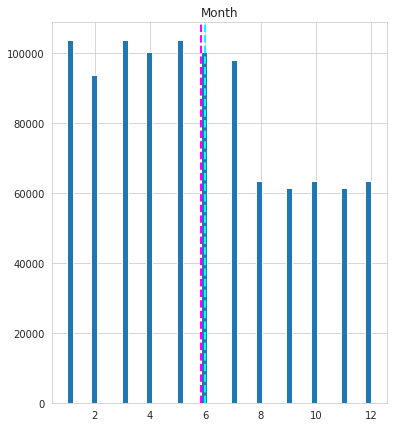

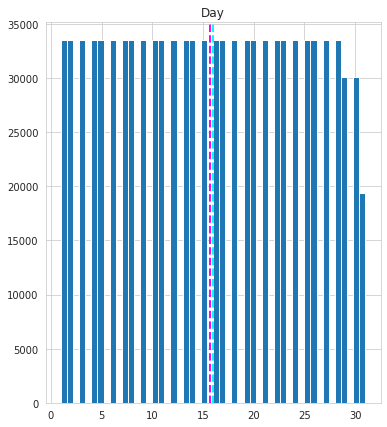

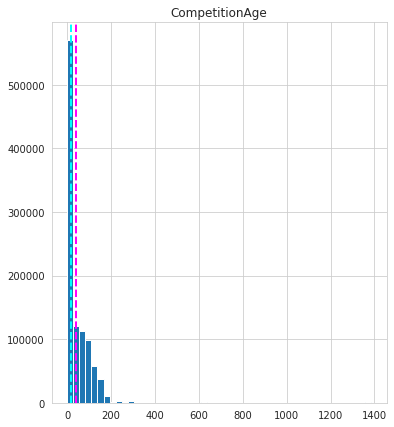

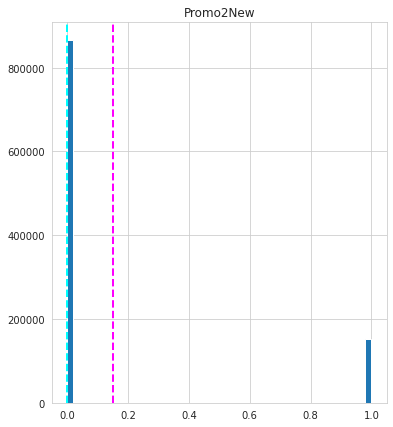

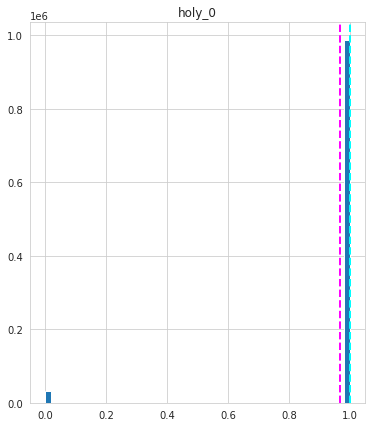

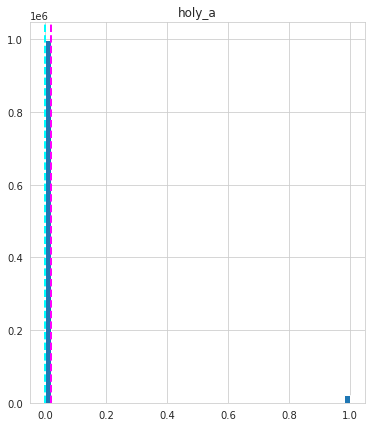

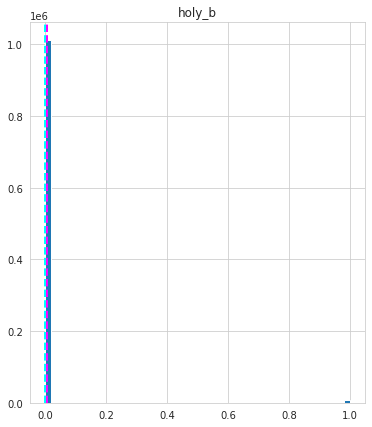

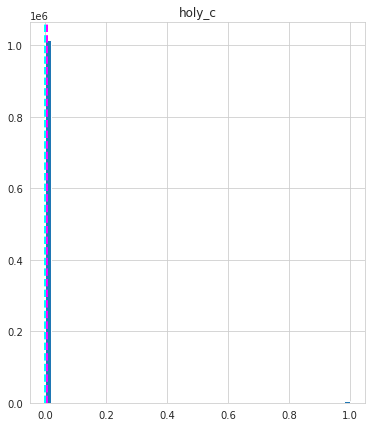

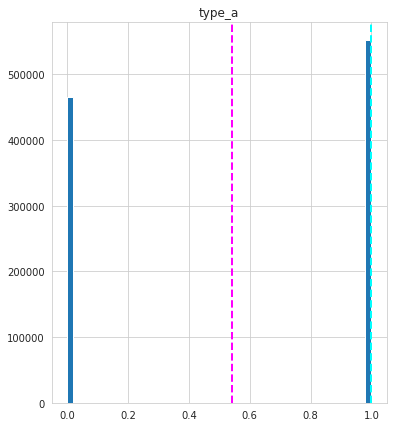

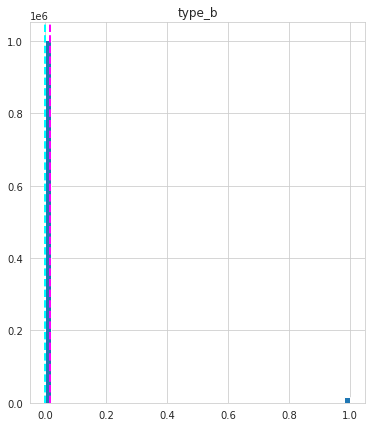

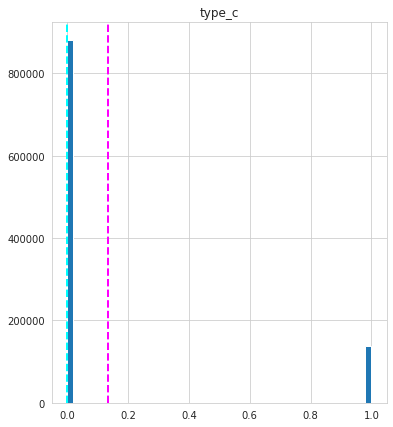

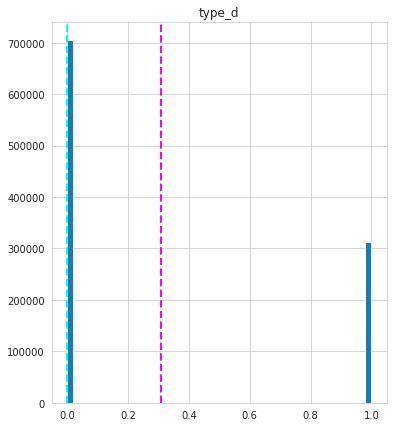

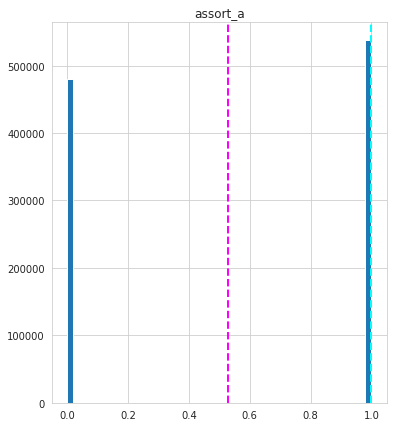

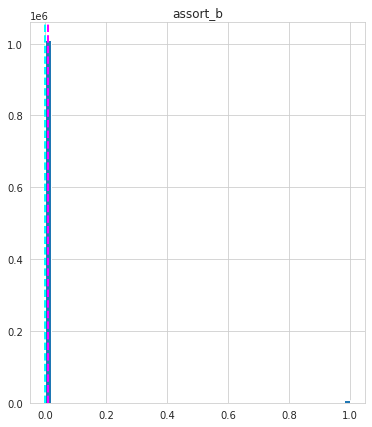

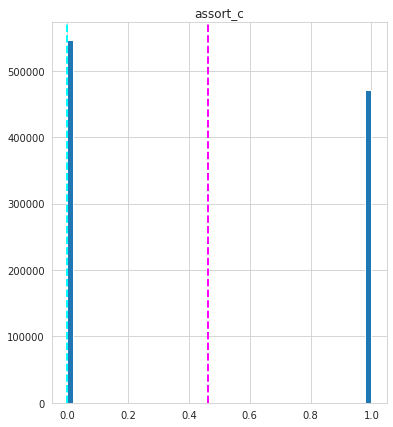

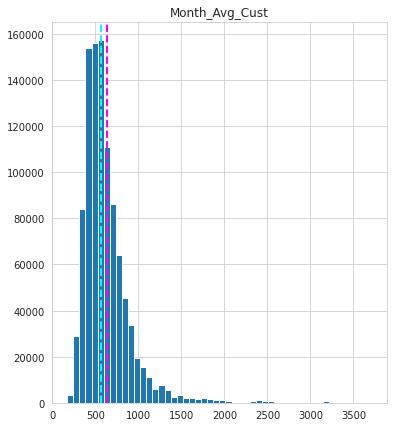

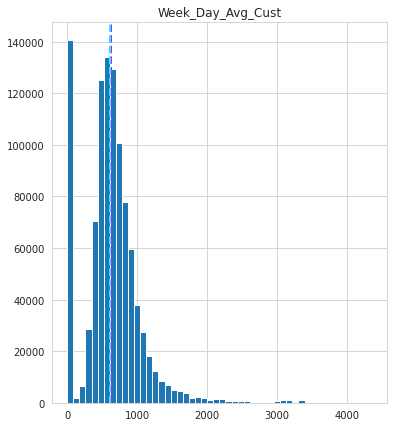

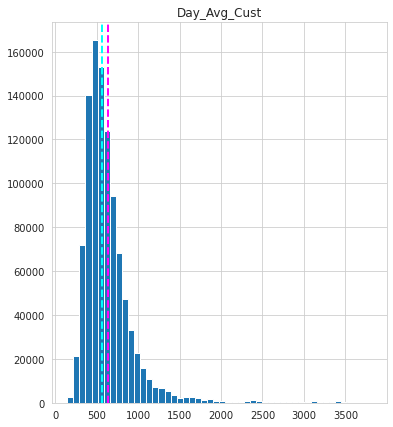

In [ ]:
# Distribustion
for col in df1.drop(columns=['Date']):
  figure=plt.figure(figsize=(6,7))
  ax=figure.gca()
  feature = df1[col]
  feature.hist(bins=50, ax = ax)
  ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
  ax.set_title(col)
plt.show()

Sales_logt -1.7037453210839324
CompetitionDistance_logt -0.35396319391457104
CompetitionAge_logt -0.04094635472635534


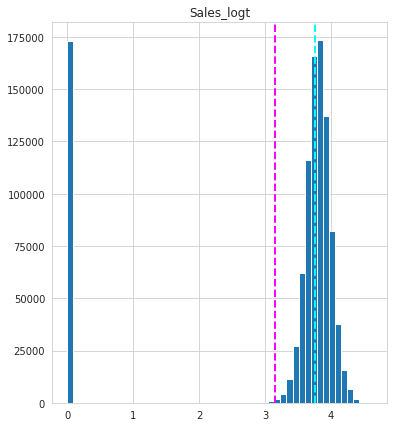

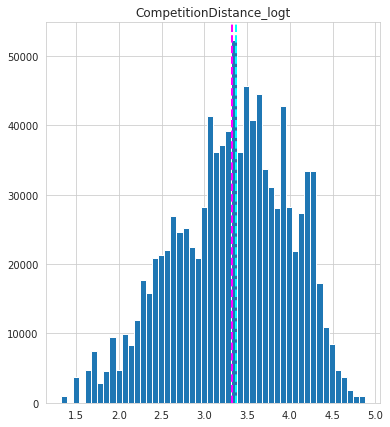

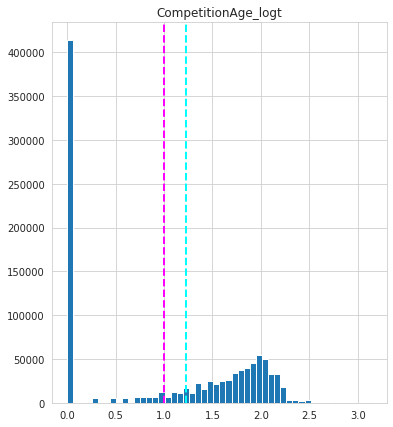

In [ ]:
# We need to normalise our data and reduce skewness for our regression task to work properly
df1['Sales_logt'] = df1['Sales'].apply(lambda x: np.log10(x+1))
df1['CompetitionDistance_logt'] = df1['CompetitionDistance'].apply(lambda x: np.log10(x+1))
df1['CompetitionAge_logt'] = df1['CompetitionAge'].apply(lambda x: np.log10(x+1))

for col in ['Sales_logt','CompetitionDistance_logt','CompetitionAge_logt']:

  print(col, df1[col].skew())
  figure=plt.figure(figsize=(6,7))
  ax=figure.gca()
  feature = df1[col]
  feature.hist(bins=50, ax = ax)
  ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
  ax.set_title(col)
plt.show()

Ignoring the zero values, the skewness has reduced considerably

#4 Model building

#4.1 Train-Test Split

In [ ]:
df1.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Open', 'Promo', 'SchoolHoliday',
       'CompetitionDistance', 'Promo2', 'Year', 'Month', 'Day',
       'CompetitionAge', 'Promo2New', 'holy_0', 'holy_a', 'holy_b', 'holy_c',
       'type_a', 'type_b', 'type_c', 'type_d', 'assort_a', 'assort_b',
       'assort_c', 'Month_Avg_Cust', 'Week_Day_Avg_Cust', 'Day_Avg_Cust',
       'Sales_logt', 'CompetitionDistance_logt', 'CompetitionAge_logt'],
      dtype='object')

In [ ]:
# We will split data on time basis and keep last 6 weeks of data in the test set
# We use Date for spliting after which we can drop the feature 
last_date = df1['Date'].max()
date_before_six_weeks = last_date - datetime.timedelta(days=42)

# This should be the last date in out train set, so lets find the respective index

train_set_first_index = df1[df1['Date']==date_before_six_weeks].first_valid_index()

print('Last Date :' , last_date ,'\n'
      'Date Before Six Weeks :', date_before_six_weeks,'\n'
      'Train Set First Index :', train_set_first_index)

Last Date : 2015-07-31 00:00:00 
Date Before Six Weeks : 2015-06-19 00:00:00 
Train Set First Index : 46830


In [ ]:
# Lets split the data
train_df = df1[train_set_first_index :]
test_df = df1[: train_set_first_index]
print('Train df :', train_df.shape,'\n'
      'Test df :' , test_df.shape)

Train df : (970325, 31) 
Test df : (46830, 31)


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017155 entries, 0 to 1017154
Data columns (total 31 columns):
 #   Column                    Non-Null Count    Dtype         
---  ------                    --------------    -----         
 0   Store                     1017155 non-null  int64         
 1   DayOfWeek                 1017155 non-null  int64         
 2   Date                      1017155 non-null  datetime64[ns]
 3   Sales                     1017155 non-null  int64         
 4   Open                      1017155 non-null  int64         
 5   Promo                     1017155 non-null  int64         
 6   SchoolHoliday             1017155 non-null  int64         
 7   CompetitionDistance       1017155 non-null  float64       
 8   Promo2                    1017155 non-null  int64         
 9   Year                      1017155 non-null  int64         
 10  Month                     1017155 non-null  int64         
 11  Day                       1017155 non-null  int64 

In [ ]:
# Defining our variables for model
X_train = train_df.drop(columns=['Date','Sales','Sales_logt','CompetitionDistance', 'CompetitionAge'])
X_test = test_df.drop(columns=['Date','Sales','Sales_logt','CompetitionDistance', 'CompetitionAge'])
y_train = train_df['Sales_logt']
y_test = test_df['Sales_logt']

In [ ]:
std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

In [ ]:
# Evaulation metrix 
# We need to inverse transform our varaibles for evaulting the model
def rmse(x, y):

    return sqrt(mean_squared_error(10**x-1, 10**y-1))

def R2_score(x,y):
  return r2_score(10**x-1,10**y-1)    

#4.2 Linear Regression

In [ ]:
lr_model= LinearRegression()
lr = lr_model.fit(X_train_std, y_train)

In [ ]:
lr.intercept_

3.151707119892592

In [ ]:
lr.coef_

array([-1.83060418e-03, -3.29694351e-04,  1.31378445e+00,  6.44102311e-02,
        2.13637413e-03,  7.29330786e-03,  9.49379697e-03,  1.27296296e-02,
       -2.14169592e-03, -1.92086151e-03, -1.94167914e+11, -1.57741752e+11,
       -9.12892465e+10, -7.15618145e+10, -3.60026666e+11, -8.94829122e+10,
       -2.46646337e+11, -3.33449581e+11, -4.99320058e+11, -8.99567332e+10,
       -4.98792722e+11, -1.53358611e-03,  1.55029735e-01,  9.70779997e-03,
        1.63916197e-02, -1.82427907e-03])

In [ ]:
y_train_pred_lr = lr.predict(X_train_std)
y_pred_lr = lr.predict(X_test_std)

In [ ]:
lr_y_train_rmse = rmse(y_train, y_train_pred_lr)
lr_y_test_rmse = rmse(y_test, y_pred_lr)
lr_y_train_r2_score = R2_score(y_train, y_train_pred_lr)
lr_y_test_r2_score = R2_score(y_test, y_pred_lr)

print("Training RMSE", ":", lr_y_train_rmse ,
      "Testing RMSE", ":",lr_y_test_rmse )
print("Training R2_Score", ":", lr_y_train_r2_score,
      "Testing R2_Score", ":",lr_y_test_r2_score)

Training RMSE : 2270.9055624380417 Testing RMSE : 2255.843353311279
Training R2_Score : 0.6530421971357224 Testing R2_Score : 0.6334708817387784


Text(0, 0.5, 'Predicted values')

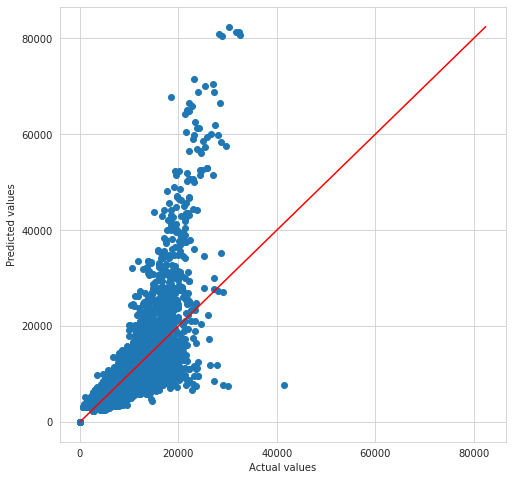

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(10**y_test-1,10**y_pred_lr-1)

p1 = max(max(10**y_pred_lr-1),max(10**y_test-1))
p2 = min(min(10**y_pred_lr-1),min(10**y_test-1))
plt.plot([p1,p2],[p1,p2],c='r')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

In [ ]:
result_df = pd.DataFrame()
result_df['Test'] = 10**y_test-1
result_df['Pred_lr'] = 10**y_pred_lr-1
result_df.head()

,Test,Pred_lr
0,5263.0,6219.416931
1,6064.0,6157.927925
2,8314.0,8072.331547
3,13995.0,11975.999452
4,4822.0,6691.881090


In [ ]:
# Checking for zero sales 
result_df[result_df['Test']==0].head()

,Test,Pred_lr
291,0.0,1.288485
875,0.0,2.127500
1406,0.0,1.347775
1990,0.0,2.835486
2521,0.0,1.330680


#4.3 Decision Tree

In [ ]:
# Keeping some restrictions to limit overfitting
dt_model = DecisionTreeRegressor(max_depth =10)
tree= dt_model.fit(X_train_std, y_train)

In [ ]:
y_train_pred_tree = tree.predict(X_train_std)
y_pred_tree = tree.predict(X_test_std)

In [ ]:
tree_y_train_rmse = rmse(y_train, y_train_pred_tree)
tree_y_test_rmse = rmse(y_test, y_pred_tree)
tree_y_train_r2_score = R2_score(y_train, y_train_pred_tree)
tree_y_test_r2_score = R2_score(y_test, y_pred_tree)

print("Training RMSE", ":", tree_y_train_rmse ,
      "Testing RMSE", ":",tree_y_test_rmse )
print("Training R2_Score", ":", tree_y_train_r2_score,
      "Testing R2_Score", ":",tree_y_test_r2_score)

Training RMSE : 1362.1538802817308 Testing RMSE : 1386.065100837529
Training R2_Score : 0.8751665841074956 Testing R2_Score : 0.8616249273040234


Text(0, 0.5, 'Predicted values')

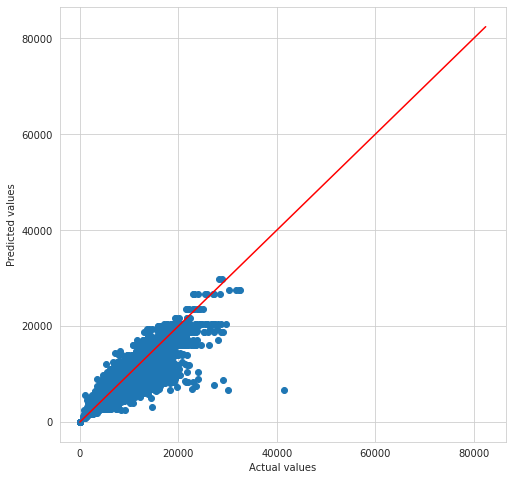

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(10**y_test-1,10**y_pred_tree-1)
p1 = max(max(10**y_pred_lr-1),max(10**y_test-1))
p2 = min(min(10**y_pred_lr-1),min(10**y_test-1))
plt.plot([p1,p2],[p1,p2],c='r')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

In [ ]:
result_df['Pred_tree'] = 10**y_pred_tree-1
result_df.head()

,Test,Pred_lr,Pred_tree
0,5263.0,6219.416931,5478.541440
1,6064.0,6157.927925,5825.714746
2,8314.0,8072.331547,8201.152917
3,13995.0,11975.999452,10457.561812
4,4822.0,6691.881090,5478.541440


In [ ]:
# Checking for zero sales 
result_df[result_df['Test']==0].head()

,Test,Pred_lr,Pred_tree
291,0.0,1.288485,0.0
875,0.0,2.127500,0.0
1406,0.0,1.347775,0.0
1990,0.0,2.835486,0.0
2521,0.0,1.330680,0.0


In [ ]:
# Cross-validation
d_tree_model = DecisionTreeRegressor()
grid_values = {'min_samples_leaf':[10,15,20],'max_depth' : [10,20,30,40]}
d_tree = GridSearchCV(d_tree_model, param_grid = grid_values, scoring = 'neg_mean_squared_error', cv=5,verbose=3)

# Fit the object to train dataset

d_tree.fit(X_train_std, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END max_depth=10, min_samples_leaf=10;, score=-0.007 total time=   7.2s
[CV 2/5] END max_depth=10, min_samples_leaf=10;, score=-0.007 total time=   7.3s
[CV 3/5] END max_depth=10, min_samples_leaf=10;, score=-0.007 total time=   5.8s
[CV 4/5] END max_depth=10, min_samples_leaf=10;, score=-0.006 total time=   5.3s
[CV 5/5] END max_depth=10, min_samples_leaf=10;, score=-0.007 total time=   5.4s
[CV 1/5] END max_depth=10, min_samples_leaf=15;, score=-0.007 total time=   5.1s
[CV 2/5] END max_depth=10, min_samples_leaf=15;, score=-0.007 total time=   5.0s
[CV 3/5] END max_depth=10, min_samples_leaf=15;, score=-0.007 total time=   5.1s
[CV 4/5] END max_depth=10, min_samples_leaf=15;, score=-0.006 total time=   7.6s
[CV 5/5] END max_depth=10, min_samples_leaf=15;, score=-0.007 total time=   7.3s
[CV 1/5] END max_depth=10, min_samples_leaf=20;, score=-0.007 total time=   6.0s
[CV 2/5] END max_depth=10, min_samples_leaf=20;,

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [10, 20, 30, 40],
                         'min_samples_leaf': [10, 15, 20]},
             scoring='neg_mean_squared_error', verbose=3)

In [ ]:
print("The best fit alpha value is found out to be :" ,d_tree.best_params_)
print("\nUsing ",d_tree.best_params_, ", squared_error is: ", d_tree.best_score_)

The best fit alpha value is found out to be : {'max_depth': 30, 'min_samples_leaf': 15}

Using  {'max_depth': 30, 'min_samples_leaf': 15} , squared_error is:  -0.004492136109857259


In [ ]:
y_train_pred_d_tree = d_tree.predict(X_train_std)
y_pred_d_tree= d_tree.predict(X_test_std)

In [ ]:
d_tree_y_train_rmse = rmse(y_train, y_train_pred_d_tree)
d_tree_y_test_rmse = rmse(y_test, y_pred_d_tree)
d_tree_y_train_r2_score = R2_score(y_train, y_train_pred_d_tree)
d_tree_y_test_r2_score = R2_score(y_test, y_pred_d_tree)

print("Training RMSE", ":", d_tree_y_train_rmse ,
      "Testing RMSE", ":",d_tree_y_test_rmse )
print("Training R2_Score", ":", d_tree_y_train_r2_score,
      "Testing R2_Score", ":", d_tree_y_test_r2_score)

Training RMSE : 788.8146115295312 Testing RMSE : 1089.204085505518
Training R2_Score : 0.9581371873547586 Testing R2_Score : 0.9145505782931087


Text(0, 0.5, 'Predicted values')

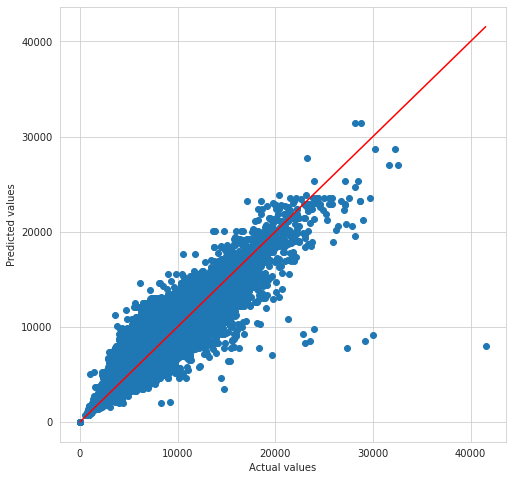

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(10**y_test-1,10**y_pred_d_tree-1)
p1 = max(max(10**y_pred_d_tree-1),max(10**y_test-1))
p2 = min(min(10**y_pred_d_tree-1),min(10**y_test-1))
plt.plot([p1,p2],[p1,p2],c='r')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

In [ ]:
result_df['Pred_tree_bestfit'] = 10**y_pred_d_tree-1
result_df.head()

,Test,Pred_lr,Pred_tree,Pred_tree_bestfit
0,5263.0,6219.416931,5478.541440,5548.929442
1,6064.0,6157.927925,5825.714746,6083.961992
2,8314.0,8072.331547,8201.152917,9069.143320
3,13995.0,11975.999452,10457.561812,12918.809436
4,4822.0,6691.881090,5478.541440,6468.042416


In [ ]:
# Lets check if zero sales is predicted correctly
print(result_df[result_df['Test']==0].shape[0])
print(result_df[result_df['Pred_tree_bestfit']==0].shape[0])
result_df[result_df['Test']==0].head()

6548
6548


,Test,Pred_lr,Pred_tree,Pred_tree_bestfit
291,0.0,1.288485,0.0,0.0
875,0.0,2.127500,0.0,0.0
1406,0.0,1.347775,0.0,0.0
1990,0.0,2.835486,0.0,0.0
2521,0.0,1.330680,0.0,0.0


#4.4 Random Forest Regressor

In [ ]:
RFR_model = RandomForestRegressor(n_estimators=10,max_depth=15)
rf= RFR_model.fit(X_train_std, y_train)

In [ ]:
y_train_pred_rf = rf.predict(X_train_std)
y_pred_rf = rf.predict(X_test_std)

In [ ]:
rf_y_train_rmse = rmse(y_train, y_train_pred_rf)
rf_y_test_rmse = rmse(y_test, y_pred_rf)
rf_y_train_r2_score = R2_score(y_train, y_train_pred_rf)
rf_y_test_r2_score = R2_score(y_test, y_pred_rf)

print("Training RMSE", ":", rf_y_train_rmse ,
      "Testing RMSE", ":",rf_y_test_rmse )
print("Training R2_Score", ":", rf_y_train_r2_score,
      "Testing R2_Score", ":",rf_y_test_r2_score)

Training RMSE : 950.8511078244502 Testing RMSE : 1090.25915491393
Training R2_Score : 0.9391719989994688 Testing R2_Score : 0.9143849550883196


Text(0, 0.5, 'Predicted values')

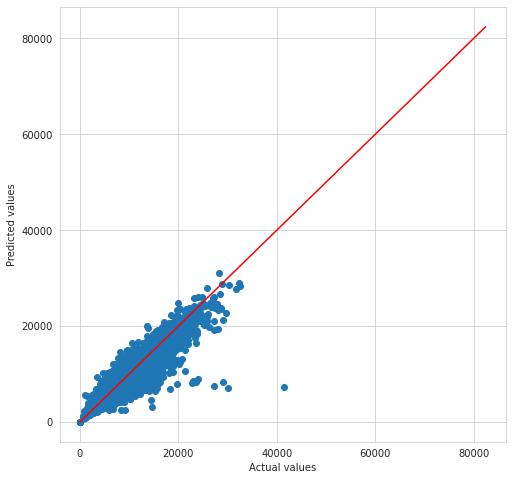

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(10**y_test-1,10**y_pred_rf-1)
p1 = max(max(10**y_pred_lr-1),max(10**y_test-1))
p2 = min(min(10**y_pred_lr-1),min(10**y_test-1))
plt.plot([p1,p2],[p1,p2],c='r')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

In [ ]:
result_df['Pred_rf'] = 10**y_pred_rf-1
result_df.head()

,Test,Pred_lr,Pred_tree,Pred_tree_bestfit,Pred_rf
0,5263.0,6219.416931,5478.541440,5548.929442,5716.287226
1,6064.0,6157.927925,5825.714746,6083.961992,6357.033939
2,8314.0,8072.331547,8201.152917,9069.143320,9374.178094
3,13995.0,11975.999452,10457.561812,12918.809436,12363.325058
4,4822.0,6691.881090,5478.541440,6468.042416,5678.621706


In [ ]:
# Imp features
features = X_train.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

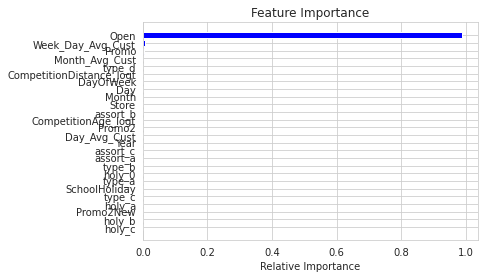

In [ ]:
# Plotting 
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

In [ ]:
features

Index(['Store', 'DayOfWeek', 'Open', 'Promo', 'SchoolHoliday', 'Promo2',
       'Year', 'Month', 'Day', 'Promo2New', 'holy_0', 'holy_a', 'holy_b',
       'holy_c', 'type_a', 'type_b', 'type_c', 'type_d', 'assort_a',
       'assort_b', 'assort_c', 'Month_Avg_Cust', 'Week_Day_Avg_Cust',
       'Day_Avg_Cust', 'CompetitionDistance_logt', 'CompetitionAge_logt'],
      dtype='object')

In [ ]:
new_indices = np.delete(indices,-1)
new_indices

array([13, 12,  9, 11, 16,  4, 14, 10, 15, 18, 20,  6, 23,  5, 25, 19,  0,
        7,  8,  1, 24, 17, 21,  3, 22])

In [ ]:
new_imp = np.delete(importances[indices],-1)
new_imp

array([2.96786120e-07, 5.31928332e-07, 1.80662304e-06, 1.81550078e-06,
       1.29793111e-05, 1.33913495e-05, 1.34480580e-05, 1.49389684e-05,
       2.17375289e-05, 2.31005868e-05, 2.31667340e-05, 4.67687197e-05,
       6.76187892e-05, 8.22924463e-05, 1.18773170e-04, 1.63740931e-04,
       2.09710251e-04, 2.31012066e-04, 2.46058909e-04, 3.01328977e-04,
       4.72441690e-04, 4.79038458e-04, 5.15882055e-04, 2.03833683e-03,
       6.76526632e-03])

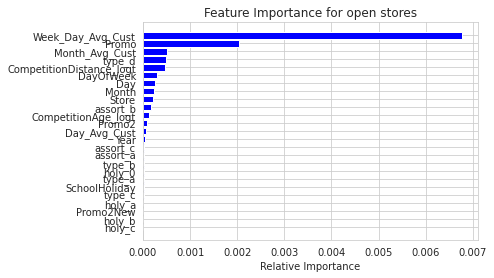

In [ ]:
# Plotting for features other than Open for better visualization
plt.title('Feature Importance for open stores')
plt.barh(range(len(new_indices)), new_imp, color='blue', align='center')
plt.yticks(range(len(new_indices)), [features[i] for i in new_indices])
plt.xlabel('Relative Importance')

plt.show()

So apart from open being the most important feature, other important features that affect the sales area week_day_avg_cust, Promo, Month_avg_custand 
competition distance

In [ ]:
# Cross-validation
rf_model = RandomForestRegressor()
grid_values = {'n_estimators':[20,30,40],'max_depth':[20,30,40],'min_samples_leaf':[5,10,15]}
rfr = GridSearchCV(rf_model, param_grid = grid_values, scoring = 'neg_mean_squared_error', cv=5,verbose=2,n_jobs=-1)

# Fit the object to train dataset

rfr.fit(X_train_std, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [20, 30, 40],
                         'min_samples_leaf': [5, 10, 15],
                         'n_estimators': [20, 30, 40]},
             scoring='neg_mean_squared_error', verbose=2)

In [ ]:
print("The best fit alpha value is found out to be :" ,rfr.best_params_)
print("\nUsing ",rfr.best_params_, " neg_mean_squared_error is: ", rfr.best_score_)

The best fit alpha value is found out to be : {'max_depth': 40, 'min_samples_leaf': 5, 'n_estimators': 40}

Using  {'max_depth': 40, 'min_samples_leaf': 5, 'n_estimators': 40}  neg_mean_squared_error is:  -0.00337021481432877


In [ ]:
y_train_pred_rfr = rfr.predict(X_train_std)
y_pred_rfr = rfr.predict(X_test_std)

In [ ]:
rfr_y_train_rmse = rmse(y_train, y_train_pred_rfr)
rfr_y_test_rmse = rmse(y_test, y_pred_rfr)
rfr_y_train_r2_score = R2_score(y_train, y_train_pred_rfr)
rfr_y_test_r2_score = R2_score(y_test, y_pred_rfr)

print("Training RMSE", ":", rfr_y_train_rmse ,
      "Testing RMSE", ":",rfr_y_test_rmse )
print("Training R2_Score", ":", rfr_y_train_r2_score,
      "Testing R2_Score", ":", rfr_y_test_r2_score)

Training RMSE : 594.4230680997387 Testing RMSE : 935.727603058542
Training R2_Score : 0.9762277756232959 Testing R2_Score : 0.9369348422460905


Text(0, 0.5, 'Predicted values')

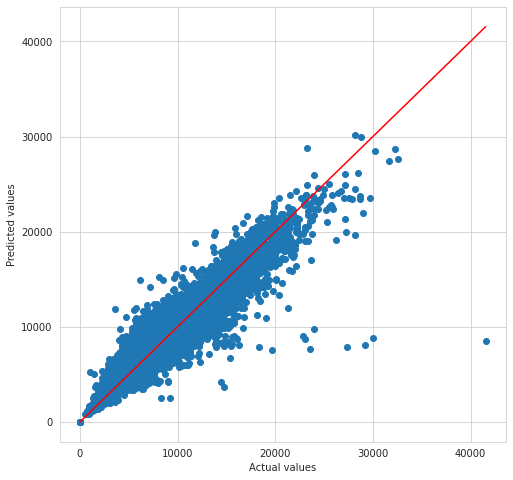

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(10**y_test-1,10**y_pred_rfr-1)
p1 = max(max(10**y_pred_rfr-1),max(10**y_test-1))
p2 = min(min(10**y_pred_rfr-1),min(10**y_test-1))
plt.plot([p1,p2],[p1,p2],c='r')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

In [ ]:
result_df['Pred_rf_bestfit'] = 10**y_pred_rfr-1
result_df.head()

,Test,Pred_lr,Pred_tree,Pred_tree_bestfit,Pred_rf,Pred_rf_bestfit
0,5263.0,6219.416931,5478.541440,5548.929442,5716.287226,5497.442047
1,6064.0,6157.927925,5825.714746,6083.961992,6357.033939,6407.902044
2,8314.0,8072.331547,8201.152917,9069.143320,9374.178094,9672.962703
3,13995.0,11975.999452,10457.561812,12918.809436,12363.325058,12554.203832
4,4822.0,6691.881090,5478.541440,6468.042416,5678.621706,6120.861395


In [ ]:
# Checking for zero sales 
result_df[result_df['Test']==0].head()

,Test,Pred_lr,Pred_tree,Pred_tree_bestfit,Pred_rf,Pred_rf_bestfit
291,0.0,1.288485,0.0,0.0,0.0,0.0
875,0.0,2.127500,0.0,0.0,0.0,0.0
1406,0.0,1.347775,0.0,0.0,0.0,0.0
1990,0.0,2.835486,0.0,0.0,0.0,0.0
2521,0.0,1.330680,0.0,0.0,0.0,0.0


#4.5 Model Selection

In [ ]:
# Lets check the results
result_df

,Test,Pred_lr,Pred_tree,Pred_tree_bestfit,Pred_rf,Pred_rf_bestfit
0,5263.0,6219.416931,5478.541440,5548.929442,5716.287226,5497.442047
1,6064.0,6157.927925,5825.714746,6083.961992,6357.033939,6407.902044
2,8314.0,8072.331547,8201.152917,9069.143320,9374.178094,9672.962703
3,13995.0,11975.999452,10457.561812,12918.809436,12363.325058,12554.203832
4,4822.0,6691.881090,5478.541440,6468.042416,5678.621706,6120.861395
...,...,...,...,...,...,...
46825,2738.0,3717.194441,2554.927834,2736.834303,2886.550091,2811.304912
46826,8528.0,5703.875450,6463.323434,7779.561468,7755.107326,8029.321985
46827,5431.0,5314.086421,6010.067634,5195.600987,5832.029980,5350.125382
46828,22183.0,64962.519104,21604.434291,21441.859247,21829.031139,21190.070165


In [ ]:
# Comparing error and R2 score
final_df = pd.DataFrame()
final_df['Train-RMSE']=[lr_y_train_rmse,d_tree_y_train_rmse,rfr_y_train_rmse]
final_df['Test-RMSE']=[lr_y_test_rmse,d_tree_y_test_rmse,rfr_y_test_rmse]
final_df['Train-R2Score']=[lr_y_train_r2_score,d_tree_y_train_r2_score,rfr_y_train_r2_score]
final_df['Test-R2Score']=[lr_y_test_r2_score,d_tree_y_test_r2_score,rfr_y_test_r2_score]
final_df.index=['LR','DTree','RF']
final_df

,Train-RMSE,Test-RMSE,Train-R2Score,Test-R2Score
LR,2270.905562,2255.843353,0.653042,0.633471
DTree,788.814612,1089.204086,0.958137,0.914551
RF,594.423068,935.727603,0.976228,0.936935


RF is giving the best results, so lets use along with the bestfit hyper-parameters

In [ ]:
# Making a function to use RF and predict sales for 6 weeks
# This function will take pre-cleaned train and test set as input, train model and will give sales priction as output
# We are assuming here that the store open/close info is available before hand and is planned
# Test set will not contain daily customer data
# Apart from train,test set , this function will take our model with hyper-parameters as input

def PredictSalesUsingRF(train_set,validation_set,best_model):
 
  # Defining our variables for model
  # Taking only the required features
  X_training = train_set.drop(columns=['Date','Sales','Sales_logt','CompetitionDistance', 'CompetitionAge'])
  X_validation = validation_set.drop(columns=['Date','Sales','Sales_logt','CompetitionDistance', 'CompetitionAge'])
  y_training = train_set['Sales_logt']
  y_validation = validation_set['Sales_logt']

  # Applying standardization on dependant variables
  stdardize = StandardScaler()
  X_training_std = stdardize.fit_transform(X_training)
  X_validation_std = stdardize.transform(X_validation)

  # Fitting our model with training set
  RF_fit = best_model.fit(X_training_std, y_training)

  # Predicting on train & validation set
  pred_on_training = RF_fit.predict(X_training_std)
  pred_on_validation = RF_fit.predict(X_validation_std)

  # Avaluating the predictions
  train_rmse = rmse(y_training, pred_on_training)
  validation_rmse = rmse(y_validation, pred_on_validation)
  train_r2_score = R2_score(y_training, pred_on_training)
  validation_r2_score = R2_score(y_validation, pred_on_validation)
  
  # Printing the evaluation matrices
  print("Training RMSE", ":", train_rmse ,
        "Validation RMSE", ":", validation_rmse)
  print("Training R2_Score", ":",train_r2_score ,
        "Validation R2_Score", ":",validation_r2_score)
  
  # Output df, concating our predictions with store id and date
  output_df =pd.DataFrame()
  output_df['Store'] =  validation_set['Store']
  output_df['Date'] =  validation_set['Date']
  # We need to inverse-transform the predicted values as we have used log transform
  output_df['Predicted_Sales'] = 10**pred_on_validation-1
  return output_df

In [ ]:
# Defining train set, validation set and our model
train_set = train_df.copy()
validation_set = test_df.copy()

# Using best hyper-parameters obtained by GridSearchCV
our_model = RandomForestRegressor(max_depth = 40, min_samples_leaf= 5,n_estimators= 40)

# Using our function
PredictSalesUsingRF(train_set,validation_set,our_model)

Training RMSE : 594.3893355020373 Validation RMSE : 936.354795167376
Training R2_Score : 0.9762304736213082 Validation R2_Score : 0.9368502722812473


,Store,Date,Predicted_Sales
0,1,2015-07-31,5630.303083
1,2,2015-07-31,6274.022818
2,3,2015-07-31,9847.704141
3,4,2015-07-31,12225.009293
4,5,2015-07-31,6152.693324
...,...,...,...
46825,1111,2015-06-20,2843.308838
46826,1112,2015-06-20,8012.011453
46827,1113,2015-06-20,5221.008645
46828,1114,2015-06-20,21390.491828


# Conclusion



*Summary from EDA*

Following are the takeaway points from EDA:
*	Apart from Sunday when max stores are closed, sale is maximum on Mondays.
*	Towards year ending sales are better on an average
*	Promo is Effective whereas Promo2 is ineffective
*	There is a dip in sales in year 2014 from July-Oct.
*	Stores are generally open state holidays and closed on school holidays. 
*	Sales are maximum on Easter holiday compared to other state holidays. 
*	Rossmann stores are performing well even when competition distance is low

Conclusion

* We saw that linear regression is not fitting well on our data and it is not able to seperate the zero sales values i.e when store is closed
*   Decision tree is working quite well and after tuning we got a score of 95% on train set & 91% on Test set which is quite good.
*   Random Forest is working exceptionally well, after tuning , we tried to keep a check on overfitting and optimised the train set score around 97% and 93% on Test set
*  Apart from store Open/Close, Important features affecting sales are found to be WeekDayAvgCust, Promo, MonthAvgCust, type_d (store_type),competition distance.
*   This completes our model building with our model ready for deployement.